In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Subway-Amsterdam

## Generate subway networks

In [4]:
sub_stations, edges, nodes, sub_routes, check_name = prepare_metro(osm_path)

topology: 100%|████████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 7952.13it/s]


In [5]:
edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,0,1,258.660599,0.010346,258,"(0, 1)","(1, 0)"
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(2, 3)","(3, 2)"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(4, 5)","(5, 4)"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,6,7,28.046592,0.001122,28,"(6, 7)","(7, 6)"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,8,492,382.935219,0.015317,382,"(8, 492)","(492, 8)"
...,...,...,...,...,...,...,...,...,...,...,...,...
957,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(803, 463)","(463, 803)"
958,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(462, 803)","(803, 462)"
959,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,804,246,9.568874,0.000383,9,"(804, 246)","(246, 804)"
960,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,463,804,73.789113,0.002952,73,"(463, 804)","(804, 463)"


In [6]:
nodes

,geometry,degree,id
0,POINT (4.9236699 52.3361909),2,0
1,POINT (4.9232197 52.3339159),2,1
2,POINT (4.9642294 52.2945339),2,2
3,POINT (4.9673168 52.2943931),2,3
4,POINT (4.9622901 52.2955678),2,4
...,...,...,...
863,POINT (4.8906476 52.3539585),2,863
864,POINT (4.8906487 52.3539577),2,864
865,POINT (4.8927726 52.3704434),2,865
866,POINT (4.9010846 52.371353),2,866


In [7]:
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}


sub_routes, check_name = recheck_metro_routes(replacement_dict, sub_stations, sub_routes)

In [8]:
sub_routes

,osm_id,route,to,name,ref,network,service,geometry
0,18683,subway,Isolatorweg,Metro 50: Gein => Isolatorweg,50,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98996 52.29640, 4.98959 52..."
1,4515354,subway,Gein,Metro 50: Isolatorweg => Gein,50,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.83880 52.38842, 4.83897 52..."
2,31249,subway,Isolatorweg,Metro 51: Centraal Station => Isolatorweg,51,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
3,4515355,subway,Centraal Station,Metro 51: Isolatorweg => Centraal Station,51,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.83880 52.38842, 4.83897 52..."
4,8466667,subway,Zuid,Metro 52: Noord => Zuid,52,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.93265 52.40228, 4.93269 52..."
5,8466671,subway,Noord,Metro 52: Zuid => Noord,52,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.87423 52.33922, 4.87552 52..."
6,18532,subway,Gaasperplas,Metro 53: Centraal Station => Gaasperplas,53,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
7,4515356,subway,Centraal Station,Metro 53: Gaasperplas => Centraal Station,53,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98373 52.31201, 4.98364 52..."
8,18423,subway,Gein,Metro 54: Centraal Station => Gein,54,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
9,4515357,subway,Centraal Station,Metro 54: Gein => Centraal Station,54,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98996 52.29640, 4.98959 52..."


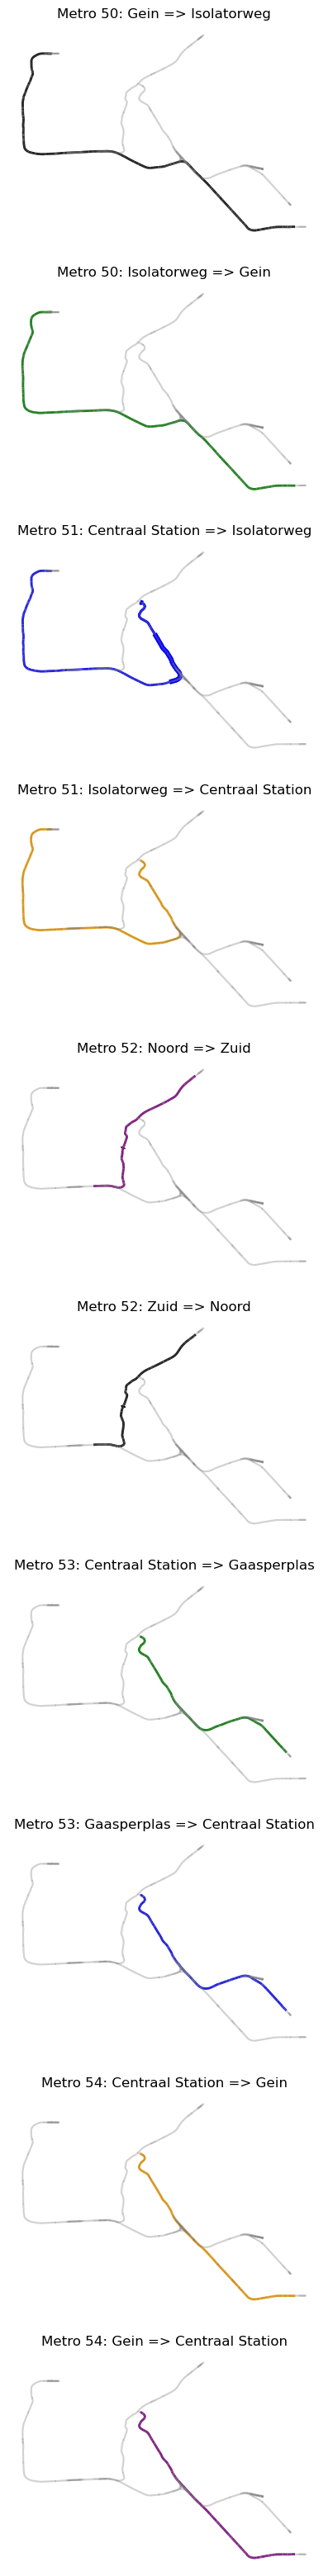

In [9]:
sub_order_route_dict, sub_shortest_path_pairs, sub_shortest_path_edges, sub_edges = metro(sub_stations, edges, nodes, sub_routes, city='Amsterdam')

In [10]:
sub_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,0,1,258.660599,0.010346,258,"(0, 1)","(1, 0)"
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(2, 3)","(3, 2)"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(4, 5)","(5, 4)"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,6,7,28.046592,0.001122,28,"(6, 7)","(7, 6)"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,8,492,382.935219,0.015317,382,"(8, 492)","(492, 8)"
...,...,...,...,...,...,...,...,...,...,...,...,...
957,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(803, 463)","(463, 803)"
958,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(462, 803)","(803, 462)"
959,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,804,246,9.568874,0.000383,9,"(804, 246)","(246, 804)"
960,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,463,804,73.789113,0.002952,73,"(463, 804)","(804, 463)"


In [11]:
sub_shortest_path_edges

{'Metro 50: Gein => Isolatorweg':         osm_id                                           geometry railway  \
 0     26419538  LINESTRING (4.850446 52.3951026, 4.8505958 52....  subway   
 1    166370272  LINESTRING (4.8392661 52.3921517, 4.839366 52....  subway   
 2    166370272  LINESTRING (4.8465456 52.3951777, 4.8467329 52...  subway   
 3    166370274  LINESTRING (4.8471465 52.3951789, 4.8471814 52...  subway   
 4    166370274  LINESTRING (4.8471814 52.3951787, 4.8473044 52...  subway   
 ..         ...                                                ...     ...   
 165  181908692  LINESTRING (4.9762604 52.296007, 4.9765098 52....  subway   
 166  181908696  LINESTRING (4.9765098 52.2960472, 4.9769403 52...  subway   
 167  181909254  LINESTRING (4.9756246 52.2959031, 4.9762604 52...  subway   
 168  397809138  LINESTRING (4.9838859 52.2963361, 4.9844451 52...  subway   
 169  397809159  LINESTRING (4.9871059 52.2963808, 4.985907 52....  subway   
 
        service   id  from_id

## Add columns to nodes

In [12]:
sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(sub_order_route_dict, sub_routes)

In [13]:
sub_order_route_dict

{'Metro 50: Gein => Isolatorweg':     id                 name                      geometry     geo_x  \
 0   21          Isolatorweg  POINT (4.8505958 52.3951031)  4.850596   
 1    0   Station Sloterdijk  POINT (4.8389786 52.3890375)  4.838979   
 2   13         De Vlugtlaan   POINT (4.838233 52.3794484)  4.838233   
 3   14  Jan van Galenstraat  POINT (4.8353639 52.3725816)  4.835364   
 4   15           Postjesweg  POINT (4.8340343 52.3645962)  4.834034   
 5   12             Lelylaan  POINT (4.8344667 52.3580615)  4.834467   
 6    2      Heemstedestraat   POINT (4.834401 52.3523291)  4.834401   
 7   11    Henk Sneevlietweg  POINT (4.8345741 52.3463868)  4.834574   
 8    8      Amstelveenseweg  POINT (4.8575709 52.3384751)  4.857571   
 9   10                 Zuid  POINT (4.8739633 52.3393223)  4.873963   
 10  19          Station RAI    POINT (4.889539 52.337689)  4.889539   
 11   9           Overamstel  POINT (4.9176063 52.3317688)  4.917606   
 12   7      Van der Madeweg  P

In [14]:
sub_new_nodes = add_columns_to_nodes(sub_order_route_dict, nodes)

In [15]:
sub_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.85060 52.39510),2,805,Isolatorweg,4.850596,52.395103,"(4.8505958, 52.3951031)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51"
1,POINT (4.83898 52.38904),2,121,Station Sloterdijk,4.838979,52.389038,"(4.8389786, 52.3890375)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51"
2,POINT (4.83823 52.37945),2,844,De Vlugtlaan,4.838233,52.379448,"(4.838233, 52.3794484)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51"
3,POINT (4.83536 52.37258),2,846,Jan van Galenstraat,4.835364,52.372582,"(4.8353639, 52.3725816)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51"
4,POINT (4.83403 52.36460),2,848,Postjesweg,4.834034,52.364596,"(4.8340343, 52.3645962)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51"
...,...,...,...,...,...,...,...,...,...,...,...
81,POINT (4.95669 52.33041),2,823,Station Diemen Zuid,4.956688,52.330406,"(4.9566878, 52.3304057)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
82,POINT (4.96734 52.32837),2,824,Verrijn Stuartweg,4.967335,52.328367,"(4.9673352, 52.3283668)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
83,POINT (4.97309 52.32372),2,301,Ganzenhoef,4.973086,52.323724,"(4.9730859, 52.3237237)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
84,POINT (4.97919 52.31704),2,821,Kraaiennest,4.979187,52.317039,"(4.9791866, 52.3170385)",Metro 53: Gaasperplas => Centraal Station,subway,53,None


### retrive all transfer stations on each route

In [16]:
sub_transfer_stations_df = all_transfer_stations_df(sub_new_nodes)

In [17]:
sub_transfer_stations_df

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.85060 52.39510),2,805,Isolatorweg,4.850596,52.395103,"(4.8505958, 52.3951031)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51"
1,POINT (4.83898 52.38904),2,121,Station Sloterdijk,4.838979,52.389038,"(4.8389786, 52.3890375)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51"
2,POINT (4.83823 52.37945),2,844,De Vlugtlaan,4.838233,52.379448,"(4.838233, 52.3794484)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51"
3,POINT (4.83536 52.37258),2,846,Jan van Galenstraat,4.835364,52.372582,"(4.8353639, 52.3725816)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51"
4,POINT (4.83403 52.36460),2,848,Postjesweg,4.834034,52.364596,"(4.8340343, 52.3645962)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51"
...,...,...,...,...,...,...,...,...,...,...,...
65,POINT (4.90094 52.37919),2,815,Centraal Station,4.900937,52.379188,"(4.9009371, 52.3791884)",Metro 52: Zuid => Noord,subway,"51, 52, 53, 54","51, 52, 53, 54"
76,POINT (4.93024 52.32972),2,826,Van der Madeweg,4.930239,52.329717,"(4.9302391, 52.3297174)",Metro 53: Centraal Station => Gaasperplas,subway,"50, 53, 54","50, 53, 54"
77,POINT (4.92061 52.34019),2,830,Spaklerweg,4.920614,52.340191,"(4.9206141, 52.3401909)",Metro 53: Centraal Station => Gaasperplas,subway,"51, 53, 54","51, 53, 54"
78,POINT (4.92105 52.34029),2,833,Spaklerweg,4.921045,52.340287,"(4.9210454, 52.3402871)",Metro 53: Gaasperplas => Centraal Station,subway,"51, 53, 54","51, 53, 54"


In [18]:
len(sub_transfer_stations_df)

62

## Add columns to edges

In [19]:
sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(sub_shortest_path_edges, sub_routes)

In [20]:
sub_shortest_path_edges

{'Metro 50: Gein => Isolatorweg':         osm_id                                           geometry railway  \
 0     26419538  LINESTRING (4.850446 52.3951026, 4.8505958 52....  subway   
 1    166370272  LINESTRING (4.8392661 52.3921517, 4.839366 52....  subway   
 2    166370272  LINESTRING (4.8465456 52.3951777, 4.8467329 52...  subway   
 3    166370274  LINESTRING (4.8471465 52.3951789, 4.8471814 52...  subway   
 4    166370274  LINESTRING (4.8471814 52.3951787, 4.8473044 52...  subway   
 ..         ...                                                ...     ...   
 165  181908692  LINESTRING (4.9762604 52.296007, 4.9765098 52....  subway   
 166  181908696  LINESTRING (4.9765098 52.2960472, 4.9769403 52...  subway   
 167  181909254  LINESTRING (4.9756246 52.2959031, 4.9762604 52...  subway   
 168  397809138  LINESTRING (4.9838859 52.2963361, 4.9844451 52...  subway   
 169  397809159  LINESTRING (4.9871059 52.2963808, 4.985907 52....  subway   
 
        service   id  from_id

In [21]:
sub_new_edges = add_columns_to_edges(sub_shortest_path_edges,edges)

In [22]:
sub_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,0,1,258.660599,0.010346,258,"(0, 1)","(1, 0)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(2, 3)","(3, 2)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(4, 5)","(5, 4)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,6,7,28.046592,0.001122,28,"(6, 7)","(7, 6)",NaN,NaN,NaN,NaN
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,8,492,382.935219,0.015317,382,"(8, 492)","(492, 8)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(803, 463)","(463, 803)",1.0,Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
958,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(462, 803)","(803, 462)",1.0,Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
959,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,804,246,9.568874,0.000383,9,"(804, 246)","(246, 804)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51
960,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,463,804,73.789113,0.002952,73,"(463, 804)","(804, 463)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51


## Test 2: Amsterdam 2 -- s-no transfer, e-no transfer, s_e are on one same route

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [23]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.931073082234942, 
    's_coordinates_y': 52.40222047445077, 
    'e_coordinates_x': 4.890980208957724, 
    'e_coordinates_y': 52.35316755185804
} 

In [24]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, sub_new_nodes)

In [25]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
62,POINT (4.93240 52.40216),2,630,Noord,4.932402,52.402157,"(4.932402, 52.4021571)",Metro 52: Noord => Zuid,subway,52,None


In [26]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
57,POINT (4.89065 52.35396),2,864,De Pijp,4.890649,52.353958,"(4.8906487, 52.3539577)",Metro 52: Noord => Zuid,subway,52,None


In [27]:
sub_routes_gdf = gpd.GeoDataFrame(sub_routes.copy())
s_node_gdf = gpd.GeoDataFrame(start_node.copy())
e_node_gdf = gpd.GeoDataFrame(end_node.copy())

In [28]:
s_node_on_route_gdf = sub_routes_gdf[sub_routes_gdf.geometry.intersects(s_node_gdf.iloc[0].geometry)]
s_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
4,8466667,subway,Zuid,Metro 52: Noord => Zuid,52,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.93265 52.40228, 4.93269 52..."


In [29]:
e_node_on_route_gdf = sub_routes_gdf[sub_routes_gdf.geometry.intersects(e_node_gdf.iloc[0].geometry)]
e_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
5,8466671,subway,Noord,Metro 52: Zuid => Noord,52,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.87423 52.33922, 4.87552 52..."


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [26]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [27]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

s_node and e_node are on one same route 

The next step is to find the same route----using function 's_e_same_routes'


### Find those same routes

In [28]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
0  52



,ref
0,52


### Get all stations between s_e nodes and transfer nodes

In [29]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,sub_routes,start_node,end_node,sub_order_route_dict)
all_stations_on_matched_routes_dfs

[   id              name                      geometry     geo_x      geo_y  \
 0  10             Noord   POINT (4.932585 52.4020575)  4.932585  52.402057   
 1   2       Noorderpark  POINT (4.9182755 52.3885941)  4.918276  52.388594   
 2   0  Centraal Station  POINT (4.9009371 52.3791884)  4.900937  52.379188   
 3   8             Rokin  POINT (4.8927726 52.3704434)  4.892773  52.370443   
 4   5      Vijzelgracht  POINT (4.8912207 52.3606661)  4.891221  52.360666   
 5   6           De Pijp  POINT (4.8906476 52.3539585)  4.890648  52.353958   
 6   4       Europaplein  POINT (4.8914299 52.3419224)   4.89143  52.341922   
 7   3              Zuid  POINT (4.8743378 52.3392141)  4.874338  52.339214   
 
            route_name_list ref   route         coordinate_value  
 0  Metro 52: Zuid => Noord  52  subway   (4.932585, 52.4020575)  
 1  Metro 52: Zuid => Noord  52  subway  (4.9182755, 52.3885941)  
 2  Metro 52: Zuid => Noord  52  subway  (4.9009371, 52.3791884)  
 3  Metro 52: Zuid 

In [30]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[   id              name                      geometry     geo_x      geo_y  \
 0  10             Noord   POINT (4.932585 52.4020575)  4.932585  52.402057   
 1   2       Noorderpark  POINT (4.9182755 52.3885941)  4.918276  52.388594   
 2   0  Centraal Station  POINT (4.9009371 52.3791884)  4.900937  52.379188   
 3   8             Rokin  POINT (4.8927726 52.3704434)  4.892773  52.370443   
 4   5      Vijzelgracht  POINT (4.8912207 52.3606661)  4.891221  52.360666   
 5   6           De Pijp  POINT (4.8906476 52.3539585)  4.890648  52.353958   
 
            route_name_list ref   route         coordinate_value  
 0  Metro 52: Zuid => Noord  52  subway   (4.932585, 52.4020575)  
 1  Metro 52: Zuid => Noord  52  subway  (4.9182755, 52.3885941)  
 2  Metro 52: Zuid => Noord  52  subway  (4.9009371, 52.3791884)  
 3  Metro 52: Zuid => Noord  52  subway  (4.8927726, 52.3704434)  
 4  Metro 52: Zuid => Noord  52  subway  (4.8912207, 52.3606661)  
 5  Metro 52: Zuid => Noord  52  subway  (4

### Get all nodes and id_pairs of nodes between s_e nodes

In [31]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,sub_new_nodes)
btw_all_id_pairs_list

[  s_id e_id
 0  716  817
 1  817  815
 2  815  865
 3  865  862
 4  862  863]

### Calculate shortest path and plot

In [32]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [33]:
btw_all_id_pairs_list_unique

[  s_id e_id
 0  716  817
 1  817  815
 2  815  865
 3  865  862
 4  862  863]

In [34]:
G = create_ground_graph(edges, nodes)

In [35]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [36]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
686,397809123,"LINESTRING (4.9182755 52.3885941, 4.9184548 52...",subway,None,686,817,624,1110.367311,0.044415,1110,"(817, 624)","(624, 817)"
687,397809127,"LINESTRING (4.9263273 52.3971585, 4.9265269 52...",subway,None,687,624,625,55.871008,0.002235,55,"(624, 625)","(625, 624)"
688,397809130,"LINESTRING (4.9312927 52.4010461, 4.9316798 52...",subway,None,688,626,627,42.318512,0.001693,42,"(626, 627)","(627, 626)"
691,397809133,"LINESTRING (4.9268044 52.3975671, 4.927107 52....",subway,None,691,625,631,238.888728,0.009556,238,"(625, 631)","(631, 625)"
849,604765191,"LINESTRING (4.9316798 52.4013438, 4.932585 52....",subway,None,849,627,716,100.493620,0.004020,100,"(627, 716)","(716, 627)"
918,814775685,"LINESTRING (4.9289408 52.3992704, 4.9292779 52...",subway,None,918,631,640,36.234022,0.001449,36,"(631, 640)","(640, 631)"
919,814775686,"LINESTRING (4.9292779 52.3995225, 4.9298225 52...",subway,None,919,640,626,218.021501,0.008721,218,"(640, 626)","(626, 640)"
685,397809123,"LINESTRING (4.9163124 52.387612, 4.9164105 52....",subway,None,685,623,817,172.634266,0.006905,172,"(623, 817)","(817, 623)"
814,562752398,"LINESTRING (4.9071106 52.3830626, 4.9083069 52...",subway,None,814,637,644,609.394809,0.024376,609,"(637, 644)","(644, 637)"
815,562752398,"LINESTRING (4.9140952 52.3864874, 4.9144116 52...",subway,None,815,644,638,27.991426,0.001120,27,"(644, 638)","(638, 644)"


In [37]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [38]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,397809123,"LINESTRING (4.9182755 52.3885941, 4.9184548 52...",subway,None,686,817,624,1110.367311,0.044415,1110,"(817, 624)","(624, 817)",1.0
1,397809127,"LINESTRING (4.9263273 52.3971585, 4.9265269 52...",subway,None,687,624,625,55.871008,0.002235,55,"(624, 625)","(625, 624)",1.0
2,397809130,"LINESTRING (4.9312927 52.4010461, 4.9316798 52...",subway,None,688,626,627,42.318512,0.001693,42,"(626, 627)","(627, 626)",1.0
3,397809133,"LINESTRING (4.9268044 52.3975671, 4.927107 52....",subway,None,691,625,631,238.888728,0.009556,238,"(625, 631)","(631, 625)",1.0
4,604765191,"LINESTRING (4.9316798 52.4013438, 4.932585 52....",subway,None,849,627,716,100.493620,0.004020,100,"(627, 716)","(716, 627)",1.0
5,814775685,"LINESTRING (4.9289408 52.3992704, 4.9292779 52...",subway,None,918,631,640,36.234022,0.001449,36,"(631, 640)","(640, 631)",1.0
6,814775686,"LINESTRING (4.9292779 52.3995225, 4.9298225 52...",subway,None,919,640,626,218.021501,0.008721,218,"(640, 626)","(626, 640)",1.0
7,397809123,"LINESTRING (4.9163124 52.387612, 4.9164105 52....",subway,None,685,623,817,172.634266,0.006905,172,"(623, 817)","(817, 623)",1.0
8,562752398,"LINESTRING (4.9071106 52.3830626, 4.9083069 52...",subway,None,814,637,644,609.394809,0.024376,609,"(637, 644)","(644, 637)",1.0
9,562752398,"LINESTRING (4.9140952 52.3864874, 4.9144116 52...",subway,None,815,644,638,27.991426,0.001120,27,"(644, 638)","(638, 644)",1.0


In [39]:
shortest_path_edges_way.time.sum()

0.2654876463295461

<Axes: >

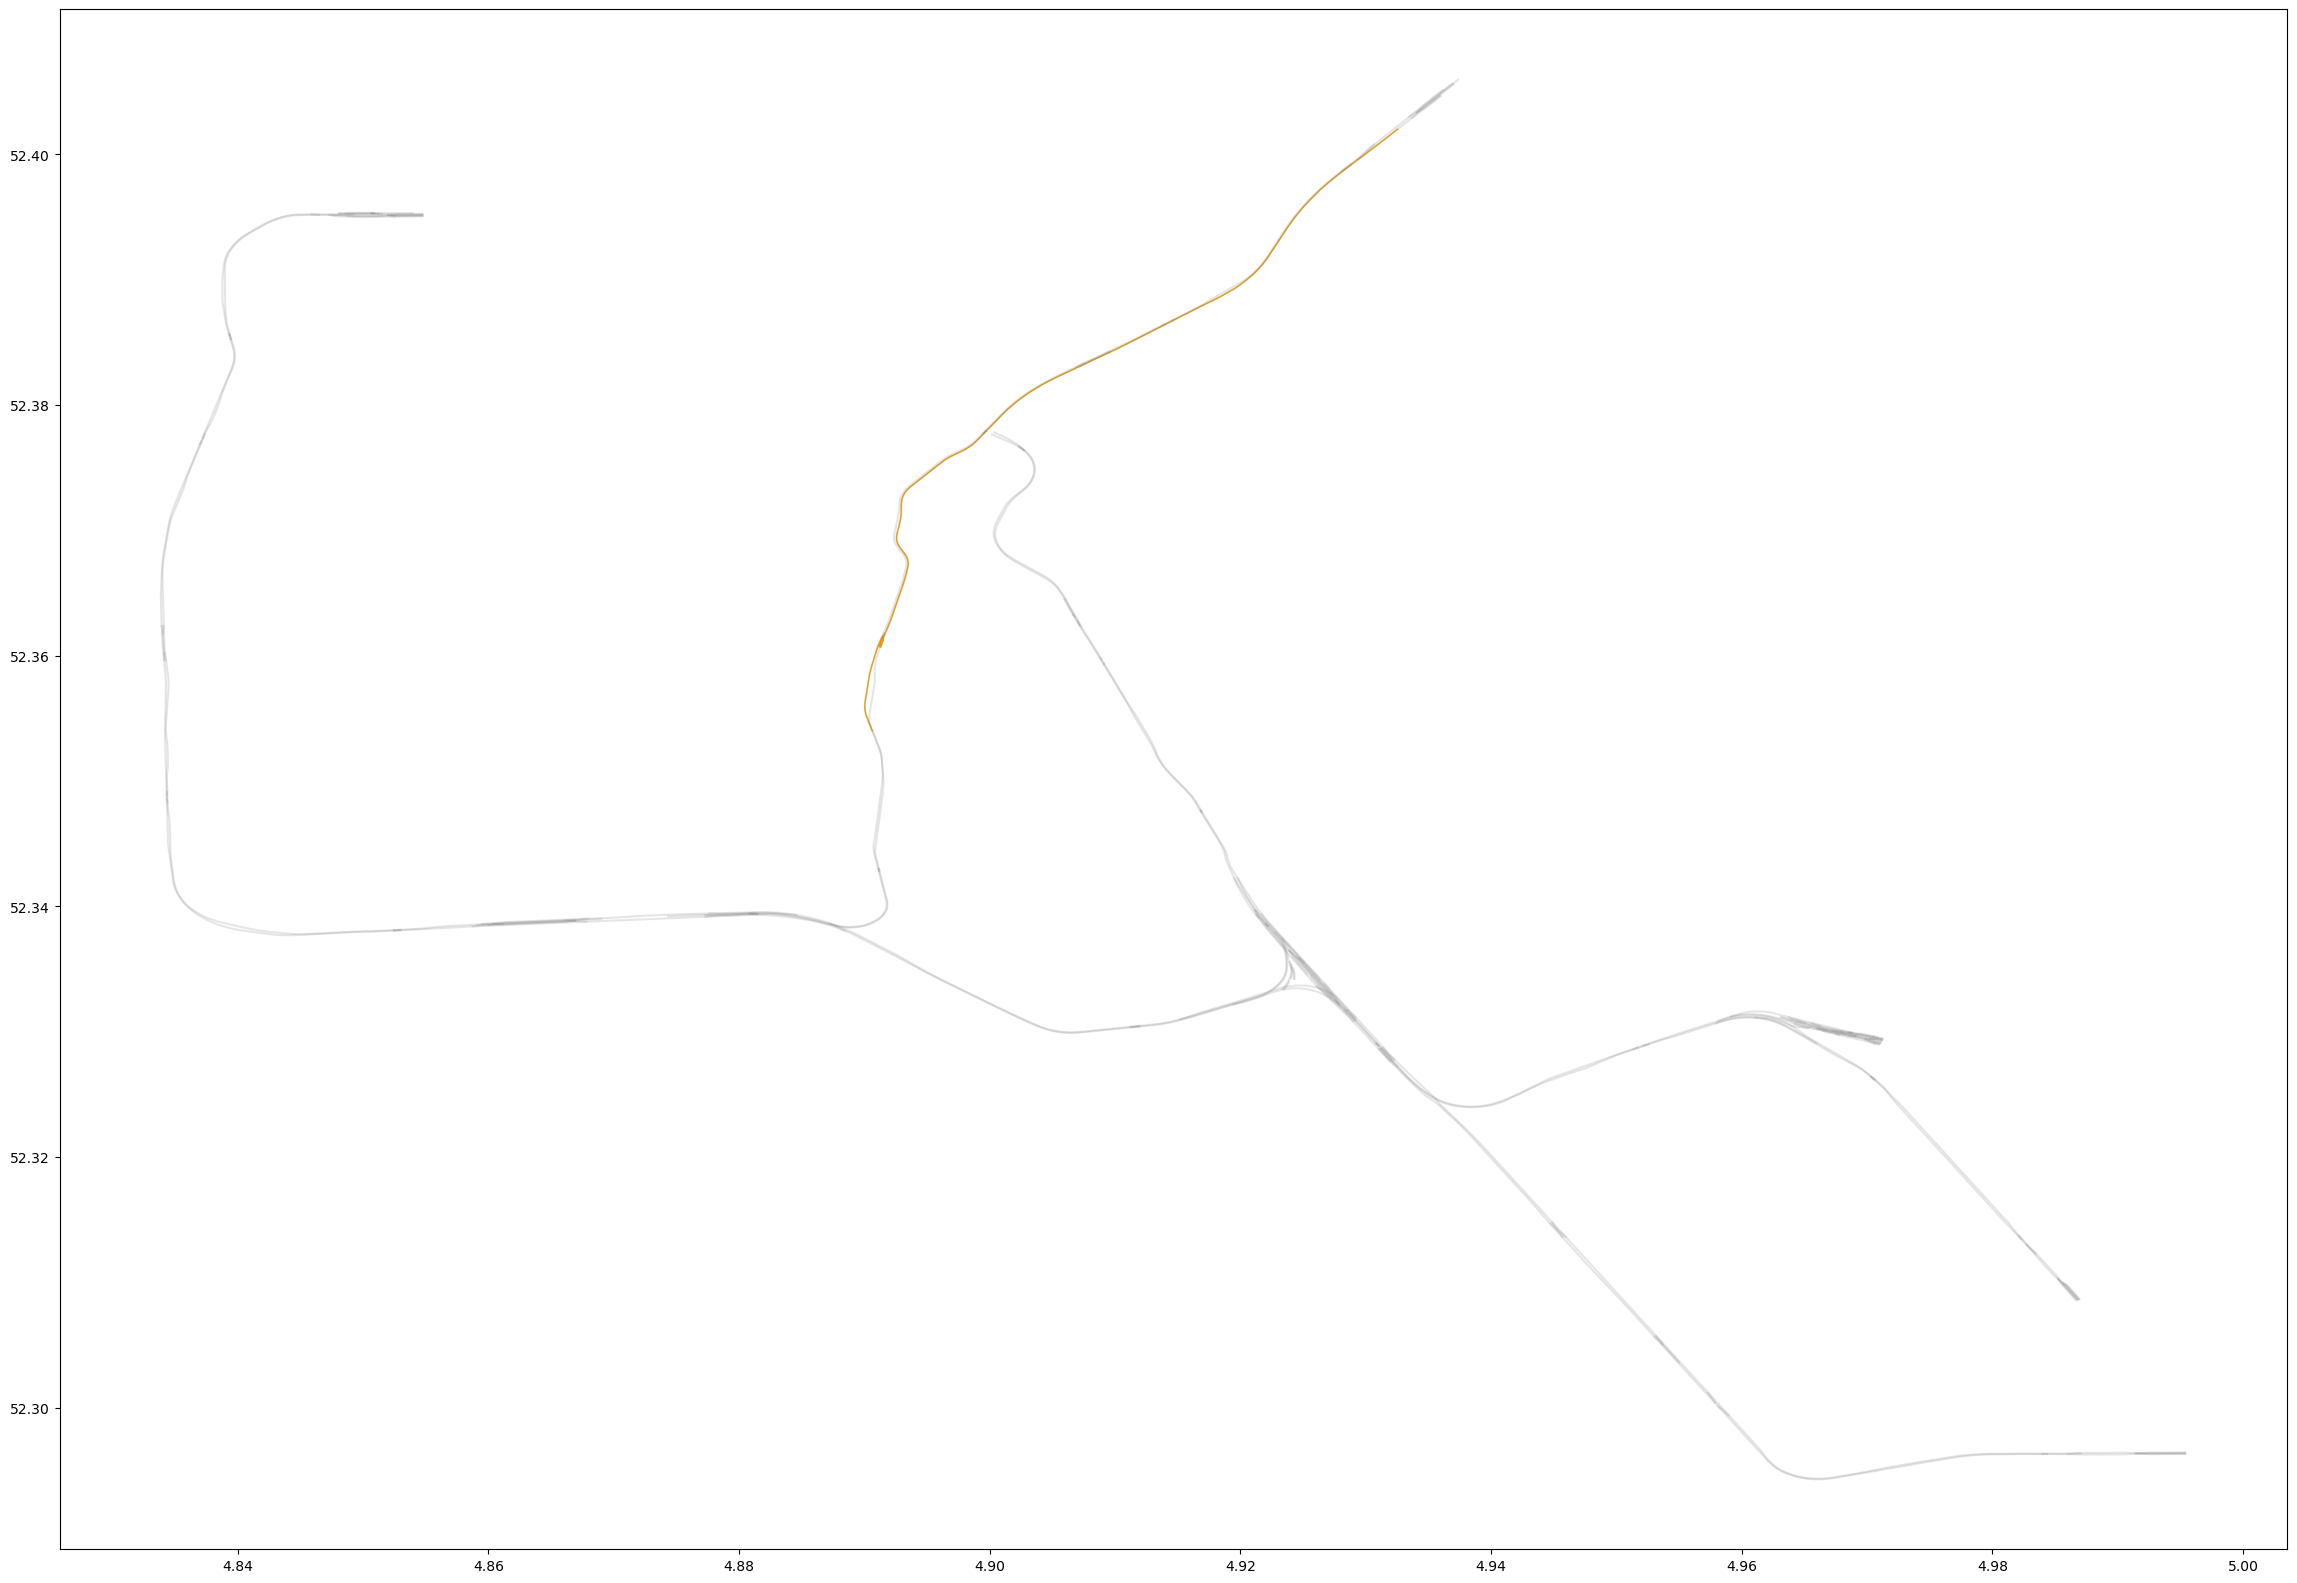

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(sub_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

## Test 3: Amsterdam 3 -- s-transfer, e-no transfer, s_e has one same route

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [23]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.899833470722866, 
    's_coordinates_y': 52.372595864348284, 
    'e_coordinates_x': 4.992177223614366, 
    'e_coordinates_y': 52.3104164576353
} 

In [24]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, sub_new_nodes)

In [25]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
43,POINT (4.90094 52.37142),2,867,Nieuwmarkt,4.900938,52.371424,"(4.9009379, 52.3714238)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 53, 54","51, 53, 54"


In [26]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
70,POINT (4.98434 52.31116),2,61,Gaasperplas,4.984339,52.311161,"(4.9843391, 52.3111615)",Metro 53: Centraal Station => Gaasperplas,subway,53,None


In [27]:
sub_routes_gdf = gpd.GeoDataFrame(sub_routes.copy())
s_node_gdf = gpd.GeoDataFrame(start_node.copy())
e_node_gdf = gpd.GeoDataFrame(end_node.copy())

In [28]:
s_node_on_route_gdf = sub_routes_gdf[sub_routes_gdf.geometry.intersects(s_node_gdf.iloc[0].geometry)]
s_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
2,31249,subway,Isolatorweg,Metro 51: Centraal Station => Isolatorweg,51,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
6,18532,subway,Gaasperplas,Metro 53: Centraal Station => Gaasperplas,53,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
8,18423,subway,Gein,Metro 54: Centraal Station => Gein,54,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."


In [29]:
e_node_on_route_gdf = sub_routes_gdf[sub_routes_gdf.geometry.intersects(e_node_gdf.iloc[0].geometry)]
e_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
6,18532,subway,Gaasperplas,Metro 53: Centraal Station => Gaasperplas,53,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [26]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [27]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

One of s_on_route is the same as e_on_route 

The next step is to find the same routes----using function 's_e_same_routes'


### Find those same routes

In [28]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
1  53



,ref
1,53


### Get all stations between s_e nodes and transfer nodes

In [29]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,sub_routes,start_node,end_node,sub_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                 name                      geometry     geo_x  \
 0   17          Gaasperplas  POINT (4.9843391 52.3111615)  4.984339   
 1    3          Kraaiennest  POINT (4.9790073 52.3169789)  4.979007   
 2    2           Ganzenhoef  POINT (4.9728869 52.3236783)  4.972887   
 3    1    Verrijn Stuartweg  POINT (4.9672062 52.3282901)  4.967206   
 4    8  Station Diemen Zuid  POINT (4.9567748 52.3303113)  4.956775   
 5    0         Venserpolder  POINT (4.9464091 52.3267211)  4.946409   
 6    9      Van der Madeweg  POINT (4.9302391 52.3297174)  4.930239   
 7   10           Spaklerweg  POINT (4.9206141 52.3401909)  4.920614   
 8    7        Amstelstation  POINT (4.9174059 52.3466361)  4.917406   
 9    5         Wibautstraat  POINT (4.9118953 52.3545601)  4.911895   
 10  13         Weesperplein  POINT (4.9078472 52.3613094)  4.907847   
 11  11        Waterlooplein  POINT (4.9036061 52.3666363)  4.903606   
 12  12           Nieuwmarkt  POINT (4.9009379 52.3714238)  4.90

In [30]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id                 name                      geometry     geo_x  \
 12  12           Nieuwmarkt  POINT (4.9009379 52.3714238)  4.900938   
 11  11        Waterlooplein  POINT (4.9036061 52.3666363)  4.903606   
 10  13         Weesperplein  POINT (4.9078472 52.3613094)  4.907847   
 9    5         Wibautstraat  POINT (4.9118953 52.3545601)  4.911895   
 8    7        Amstelstation  POINT (4.9174059 52.3466361)  4.917406   
 7   10           Spaklerweg  POINT (4.9206141 52.3401909)  4.920614   
 6    9      Van der Madeweg  POINT (4.9302391 52.3297174)  4.930239   
 5    0         Venserpolder  POINT (4.9464091 52.3267211)  4.946409   
 4    8  Station Diemen Zuid  POINT (4.9567748 52.3303113)  4.956775   
 3    1    Verrijn Stuartweg  POINT (4.9672062 52.3282901)  4.967206   
 2    2           Ganzenhoef  POINT (4.9728869 52.3236783)  4.972887   
 1    3          Kraaiennest  POINT (4.9790073 52.3169789)  4.979007   
 0   17          Gaasperplas  POINT (4.9843391 52.3111615)  4.98

### Get all nodes and id_pairs of nodes between s_e nodes

In [31]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,sub_new_nodes)
btw_all_id_pairs_list

[   s_id e_id
 0   260  460
 1   460  459
 2   459  867
 3   867  819
 4   819   61
 5    61  812
 6   812   56
 7    56   54
 8    54  822
 9   822  811
 10  811  826
 11  826  830]

### Calculate shortest path and plot

In [32]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [33]:
btw_all_id_pairs_list_unique

[   s_id e_id
 0   260  460
 1   460  459
 2   459  867
 3   867  819
 4   819   61
 5    61  812
 6   812   56
 7    56   54
 8    54  822
 9   822  811
 10  811  826
 11  826  830]

In [34]:
G = create_ground_graph(edges, nodes)

In [35]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [36]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
549,324074918,"LINESTRING (4.9078472 52.3613094, 4.9078986 52...",subway,None,549,460,650,166.665234,0.006667,166,"(460, 650)","(650, 460)"
550,324074918,"LINESTRING (4.9087261 52.3599113, 4.9087418 52...",subway,None,550,650,657,82.987704,0.003320,82,"(650, 657)","(657, 650)"
551,324074918,"LINESTRING (4.9091571 52.3592136, 4.9092078 52...",subway,None,551,657,260,550.352011,0.022014,550,"(657, 260)","(260, 657)"
539,324074877,"LINESTRING (4.9036061 52.3666363, 4.9037158 52...",subway,None,539,459,653,427.723219,0.017109,427,"(459, 653)","(653, 459)"
541,324074877,"LINESTRING (4.9071618 52.362395, 4.9072096 52....",subway,None,541,647,460,129.484427,0.005179,129,"(647, 460)","(460, 647)"
...,...,...,...,...,...,...,...,...,...,...,...,...
738,404996035,"LINESTRING (4.9252133 52.3349475, 4.9245284 52...",subway,yard,738,687,619,137.978179,0.005519,137,"(687, 619)","(619, 687)"
749,503528032,"LINESTRING (4.9279902 52.33203, 4.928226 52.33...",subway,None,749,522,272,39.216466,0.001569,39,"(522, 272)","(272, 522)"
753,503528036,"LINESTRING (4.9276484 52.3324075, 4.9276417 52...",subway,yard,753,523,265,0.931719,0.000037,0,"(523, 265)","(265, 523)"
948,1061085948,"LINESTRING (4.9220291 52.3384196, 4.9218739 52...",subway,yard,948,798,279,81.096385,0.003244,81,"(798, 279)","(279, 798)"


In [37]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [38]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,324074918,"LINESTRING (4.9078472 52.3613094, 4.9078986 52...",subway,None,549,460,650,166.665234,0.006667,166,"(460, 650)","(650, 460)",2.0
1,324074918,"LINESTRING (4.9087261 52.3599113, 4.9087418 52...",subway,None,550,650,657,82.987704,0.003320,82,"(650, 657)","(657, 650)",2.0
2,324074918,"LINESTRING (4.9091571 52.3592136, 4.9092078 52...",subway,None,551,657,260,550.352011,0.022014,550,"(657, 260)","(260, 657)",2.0
3,324074877,"LINESTRING (4.9036061 52.3666363, 4.9037158 52...",subway,None,539,459,653,427.723219,0.017109,427,"(459, 653)","(653, 459)",2.0
4,324074877,"LINESTRING (4.9071618 52.362395, 4.9072096 52....",subway,None,541,647,460,129.484427,0.005179,129,"(647, 460)","(460, 647)",2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,404996035,"LINESTRING (4.9252133 52.3349475, 4.9245284 52...",subway,yard,738,687,619,137.978179,0.005519,137,"(687, 619)","(619, 687)",2.0
161,503528032,"LINESTRING (4.9279902 52.33203, 4.928226 52.33...",subway,None,749,522,272,39.216466,0.001569,39,"(522, 272)","(272, 522)",2.0
162,503528036,"LINESTRING (4.9276484 52.3324075, 4.9276417 52...",subway,yard,753,523,265,0.931719,0.000037,0,"(523, 265)","(265, 523)",2.0
163,1061085948,"LINESTRING (4.9220291 52.3384196, 4.9218739 52...",subway,yard,948,798,279,81.096385,0.003244,81,"(798, 279)","(279, 798)",2.0


In [39]:
shortest_path_edges_way.time.sum()

0.7765167646358715

<Axes: >

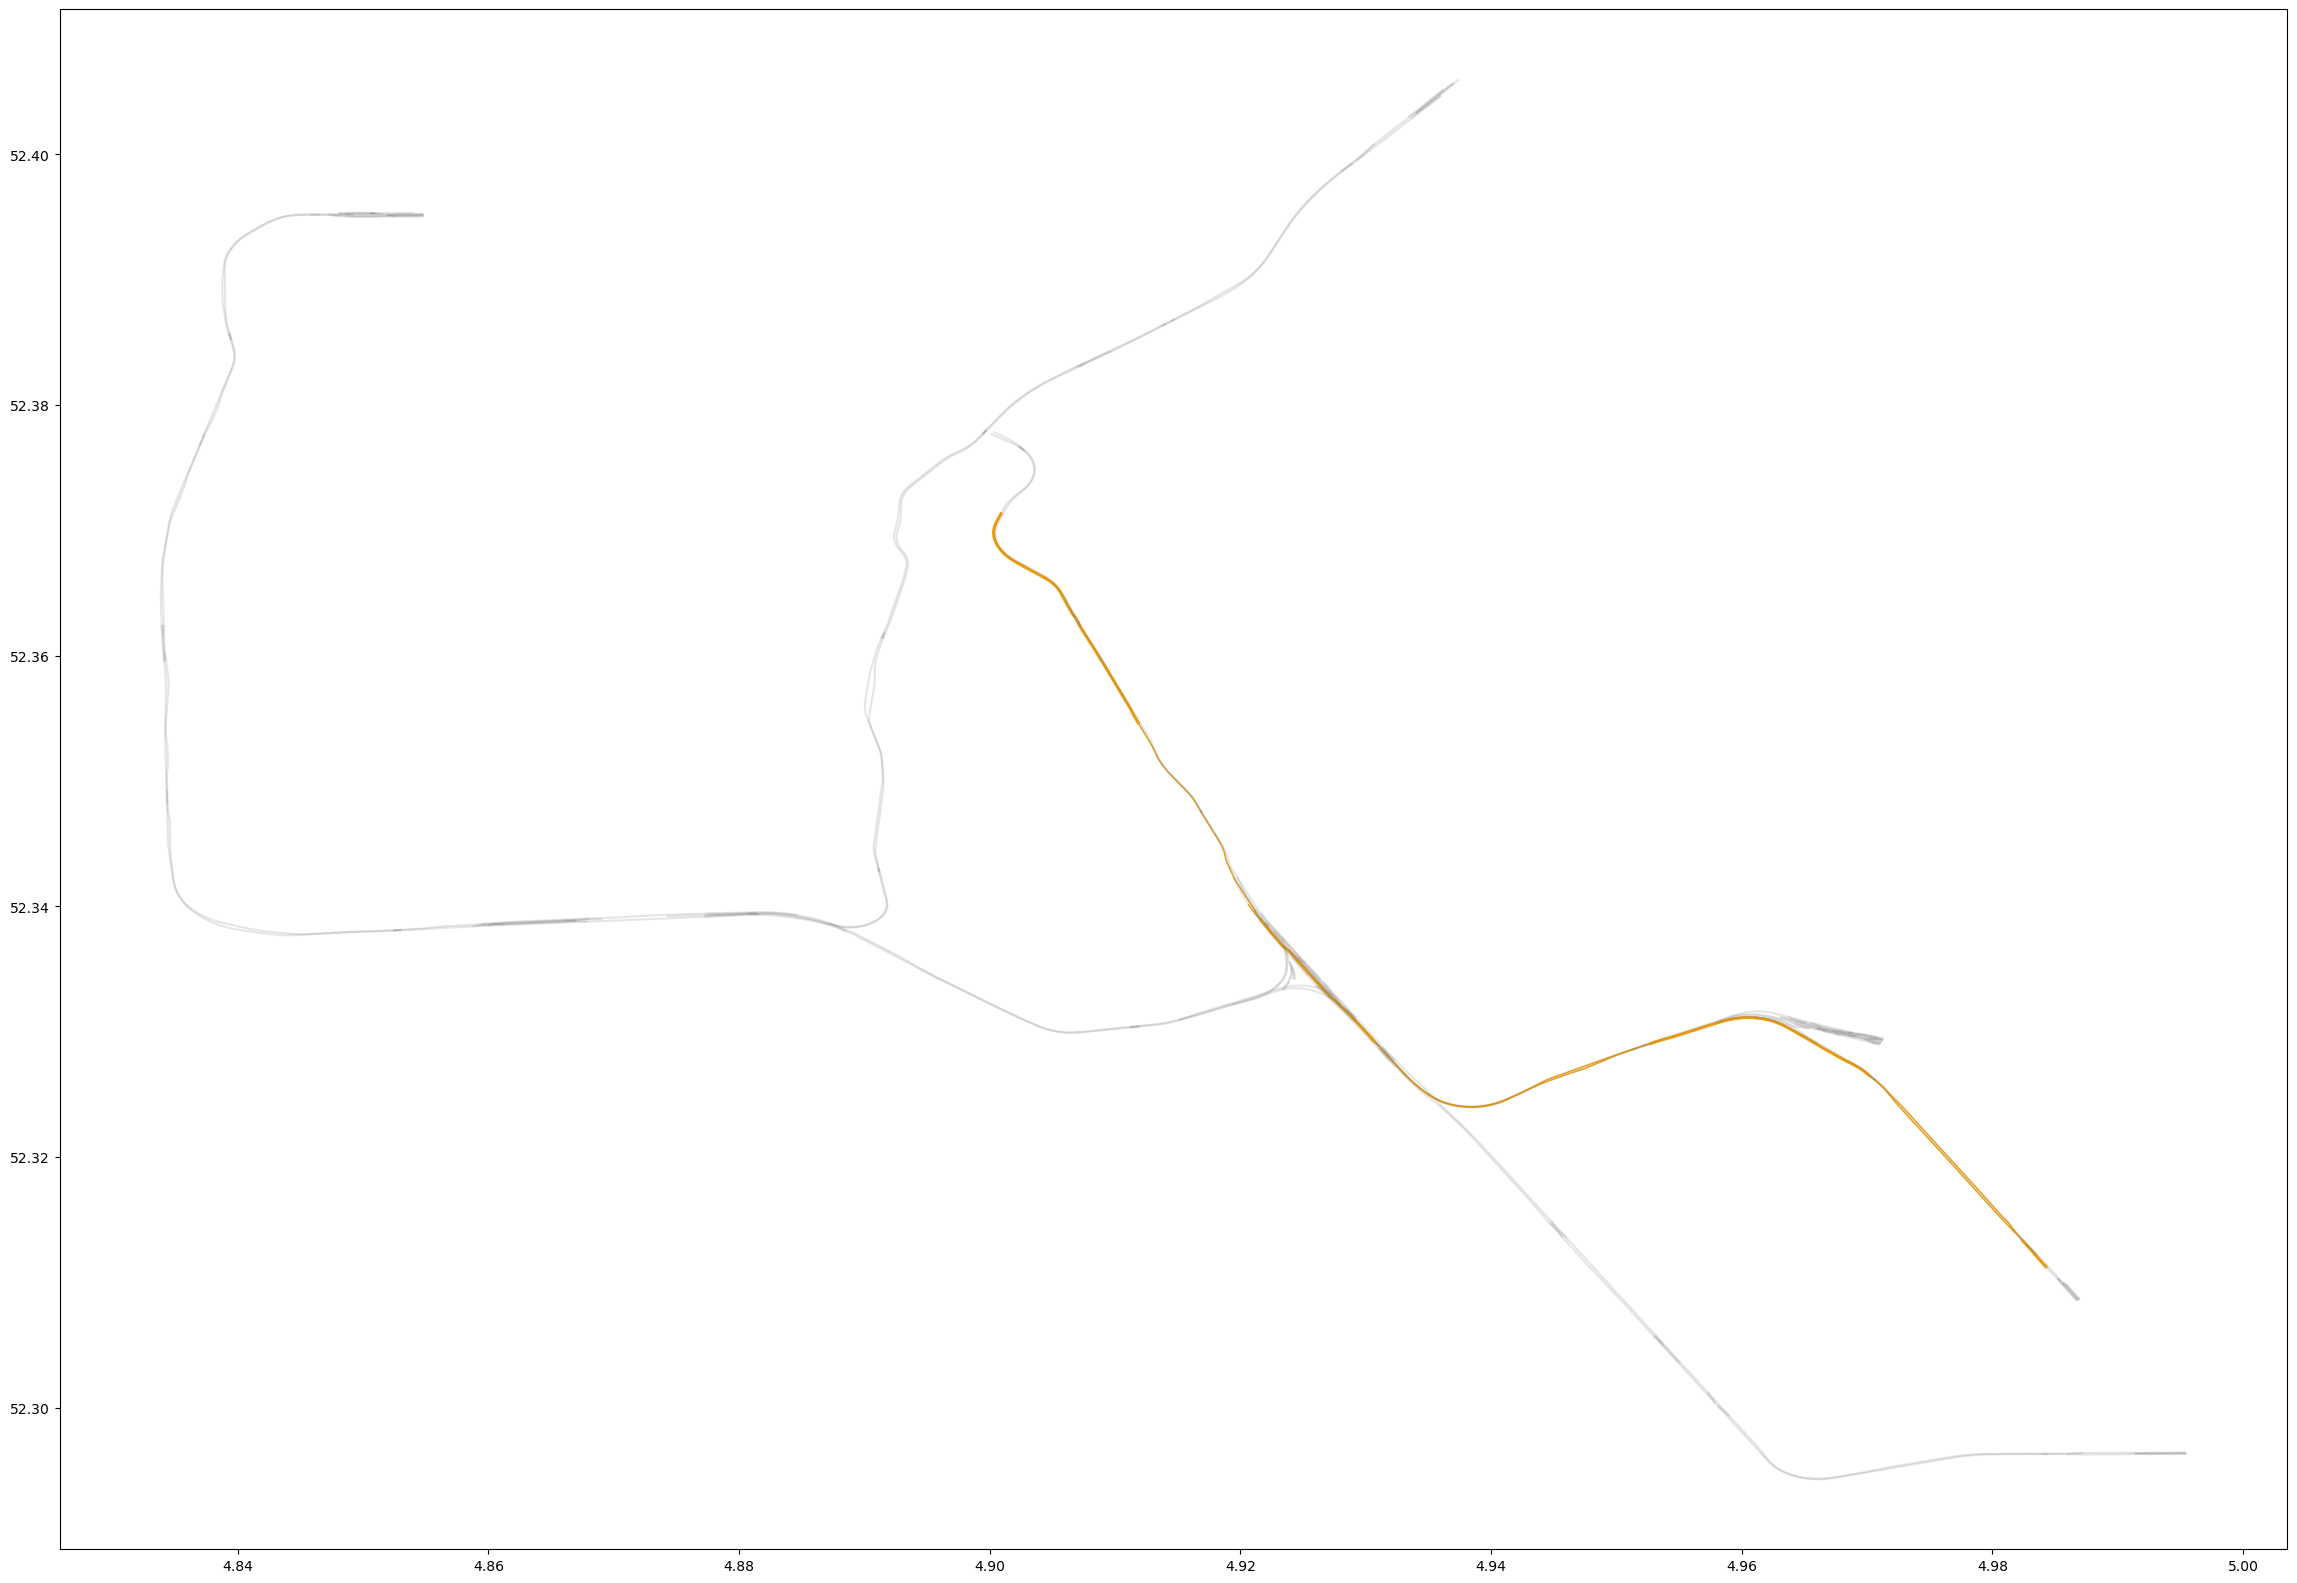

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(sub_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

## Test 4: Amsterdam 4 -- s-transfer, e-transfer, s_e has partially same route

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [23]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.899833470722866, 
    's_coordinates_y': 52.372595864348284, 
    'e_coordinates_x': 4.988571758394345, 
    'e_coordinates_y': 52.29715458139936
} 

In [24]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, sub_new_nodes)

In [25]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
43,POINT (4.90094 52.37142),2,867,Nieuwmarkt,4.900938,52.371424,"(4.9009379, 52.3714238)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 53, 54","51, 53, 54"


In [26]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
19,POINT (4.98916 52.29641),2,328,Gein,4.989161,52.296407,"(4.9891612, 52.2964067)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"


In [27]:
sub_routes_gdf = gpd.GeoDataFrame(sub_routes.copy())
s_node_gdf = gpd.GeoDataFrame(start_node.copy())
e_node_gdf = gpd.GeoDataFrame(end_node.copy())

In [28]:
s_node_on_route_gdf = sub_routes_gdf[sub_routes_gdf.geometry.intersects(s_node_gdf.iloc[0].geometry)]
s_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
2,31249,subway,Isolatorweg,Metro 51: Centraal Station => Isolatorweg,51,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
6,18532,subway,Gaasperplas,Metro 53: Centraal Station => Gaasperplas,53,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
8,18423,subway,Gein,Metro 54: Centraal Station => Gein,54,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."


In [29]:
e_node_on_route_gdf = sub_routes_gdf[sub_routes_gdf.geometry.intersects(e_node_gdf.iloc[0].geometry)]
e_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
0,18683,subway,Isolatorweg,Metro 50: Gein => Isolatorweg,50,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98996 52.29640, 4.98959 52..."
9,4515357,subway,Centraal Station,Metro 54: Gein => Centraal Station,54,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98996 52.29640, 4.98959 52..."


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [26]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [27]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

Some of e_on_route is the same as some of s_on_route 

The next step is to find the same routes----using function 's_e_same_routes'


### Find those same routes

In [28]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
2  54



,ref
2,54


### Get all stations between s_e nodes and transfer nodes

In [29]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,sub_routes,start_node,end_node,sub_order_route_dict)
all_stations_on_matched_routes_dfs

[    id              name                      geometry     geo_x      geo_y  \
 0   16  Centraal Station  POINT (4.9010471 52.3775081)  4.901047  52.377508   
 1   12        Nieuwmarkt   POINT (4.9010846 52.371353)  4.901085  52.371353   
 2   13     Waterlooplein  POINT (4.9037527 52.3666905)  4.903753   52.36669   
 3   14      Weesperplein  POINT (4.9079182 52.3613263)  4.907918  52.361326   
 4    0      Wibautstraat  POINT (4.9120486 52.3545947)  4.912049  52.354595   
 5    6     Amstelstation  POINT (4.9174767 52.3466483)  4.917477  52.346648   
 6    8        Spaklerweg  POINT (4.9210454 52.3402871)  4.921045  52.340287   
 7    7   Van der Madeweg  POINT (4.9304544 52.3297847)  4.930454  52.329785   
 8    9      Duivendrecht  POINT (4.9365601 52.3236024)   4.93656  52.323602   
 9    2       Strandvliet  POINT (4.9413977 52.3186119)  4.941398  52.318612   
 10   3     Bijlmer ArenA   POINT (4.9476178 52.311806)  4.947618  52.311806   
 11   5         Bullewijk   POINT (4.952

In [30]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id             name                      geometry     geo_x      geo_y  \
 1   12       Nieuwmarkt   POINT (4.9010846 52.371353)  4.901085  52.371353   
 2   13    Waterlooplein  POINT (4.9037527 52.3666905)  4.903753   52.36669   
 3   14     Weesperplein  POINT (4.9079182 52.3613263)  4.907918  52.361326   
 4    0     Wibautstraat  POINT (4.9120486 52.3545947)  4.912049  52.354595   
 5    6    Amstelstation  POINT (4.9174767 52.3466483)  4.917477  52.346648   
 6    8       Spaklerweg  POINT (4.9210454 52.3402871)  4.921045  52.340287   
 7    7  Van der Madeweg  POINT (4.9304544 52.3297847)  4.930454  52.329785   
 8    9     Duivendrecht  POINT (4.9365601 52.3236024)   4.93656  52.323602   
 9    2      Strandvliet  POINT (4.9413977 52.3186119)  4.941398  52.318612   
 10   3    Bijlmer ArenA   POINT (4.9476178 52.311806)  4.947618  52.311806   
 11   5        Bullewijk   POINT (4.9521292 52.306869)  4.952129  52.306869   
 12  10      Holendrecht  POINT (4.9601264 52.298131

### Get all nodes and id_pairs of nodes between s_e nodes

In [31]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,sub_new_nodes)
btw_all_id_pairs_list

[   s_id e_id
 0   828  852
 1   852  808
 2   808  809
 3   809  810
 4   810  854
 5   854  855
 6   855  328
 7   328  866
 8   866  137
 9   137  138
 10  138  139
 11  139  820
 12  820  833]

### Calculate shortest path and plot

In [32]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [33]:
btw_all_id_pairs_list_unique

[   s_id e_id
 0   828  852
 1   852  808
 2   808  809
 3   809  810
 4   810  854
 5   854  855
 6   855  328
 7   328  866
 8   866  137
 9   137  138
 10  138  139
 11  139  820
 12  820  833]

In [34]:
G = create_ground_graph(edges, nodes)

In [35]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [36]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
30,23208093,"LINESTRING (4.9339577 52.3261614, 4.9340434 52...",subway,None,30,44,45,10.636825,0.000425,10,"(44, 45)","(45, 44)"
31,23208094,"LINESTRING (4.9340434 52.3260815, 4.9341338 52...",subway,None,31,45,46,288.600920,0.011544,288,"(45, 46)","(46, 45)"
45,24342559,"LINESTRING (4.9362712 52.3238791, 4.9365601 52...",subway,None,45,46,852,36.544287,0.001462,36,"(46, 852)","(852, 46)"
237,166130754,"LINESTRING (4.9313416 52.3287902, 4.931312 52....",subway,None,237,211,218,4.257604,0.000170,4,"(211, 218)","(218, 211)"
239,166130756,"LINESTRING (4.9339577 52.3261614, 4.9323357 52...",subway,None,239,44,227,208.101817,0.008324,208,"(44, 227)","(227, 44)"
...,...,...,...,...,...,...,...,...,...,...,...,...
286,166133735,"LINESTRING (4.9189782 52.3438424, 4.9188817 52...",subway,None,286,253,820,329.341716,0.013174,329,"(253, 820)","(820, 253)"
544,324074890,"LINESTRING (4.9210454 52.3402871, 4.9207679 52...",subway,None,544,833,462,164.290754,0.006572,164,"(833, 462)","(462, 833)"
545,324074895,"LINESTRING (4.9197172 52.3423576, 4.91964 52.3...",subway,None,545,463,252,15.442083,0.000618,15,"(463, 252)","(252, 463)"
957,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(803, 463)","(463, 803)"


In [37]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [38]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,23208093,"LINESTRING (4.9339577 52.3261614, 4.9340434 52...",subway,None,30,44,45,10.636825,0.000425,10,"(44, 45)","(45, 44)",1.0
1,23208094,"LINESTRING (4.9340434 52.3260815, 4.9341338 52...",subway,None,31,45,46,288.600920,0.011544,288,"(45, 46)","(46, 45)",1.0
2,24342559,"LINESTRING (4.9362712 52.3238791, 4.9365601 52...",subway,None,45,46,852,36.544287,0.001462,36,"(46, 852)","(852, 46)",1.0
3,166130754,"LINESTRING (4.9313416 52.3287902, 4.931312 52....",subway,None,237,211,218,4.257604,0.000170,4,"(211, 218)","(218, 211)",1.0
4,166130756,"LINESTRING (4.9339577 52.3261614, 4.9323357 52...",subway,None,239,44,227,208.101817,0.008324,208,"(44, 227)","(227, 44)",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,166133735,"LINESTRING (4.9189782 52.3438424, 4.9188817 52...",subway,None,286,253,820,329.341716,0.013174,329,"(253, 820)","(820, 253)",2.0
197,324074890,"LINESTRING (4.9210454 52.3402871, 4.9207679 52...",subway,None,544,833,462,164.290754,0.006572,164,"(833, 462)","(462, 833)",2.0
198,324074895,"LINESTRING (4.9197172 52.3423576, 4.91964 52.3...",subway,None,545,463,252,15.442083,0.000618,15,"(463, 252)","(252, 463)",2.0
199,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(803, 463)","(463, 803)",2.0


In [39]:
shortest_path_edges_way.time.sum()

0.8601843603409272

<Axes: >

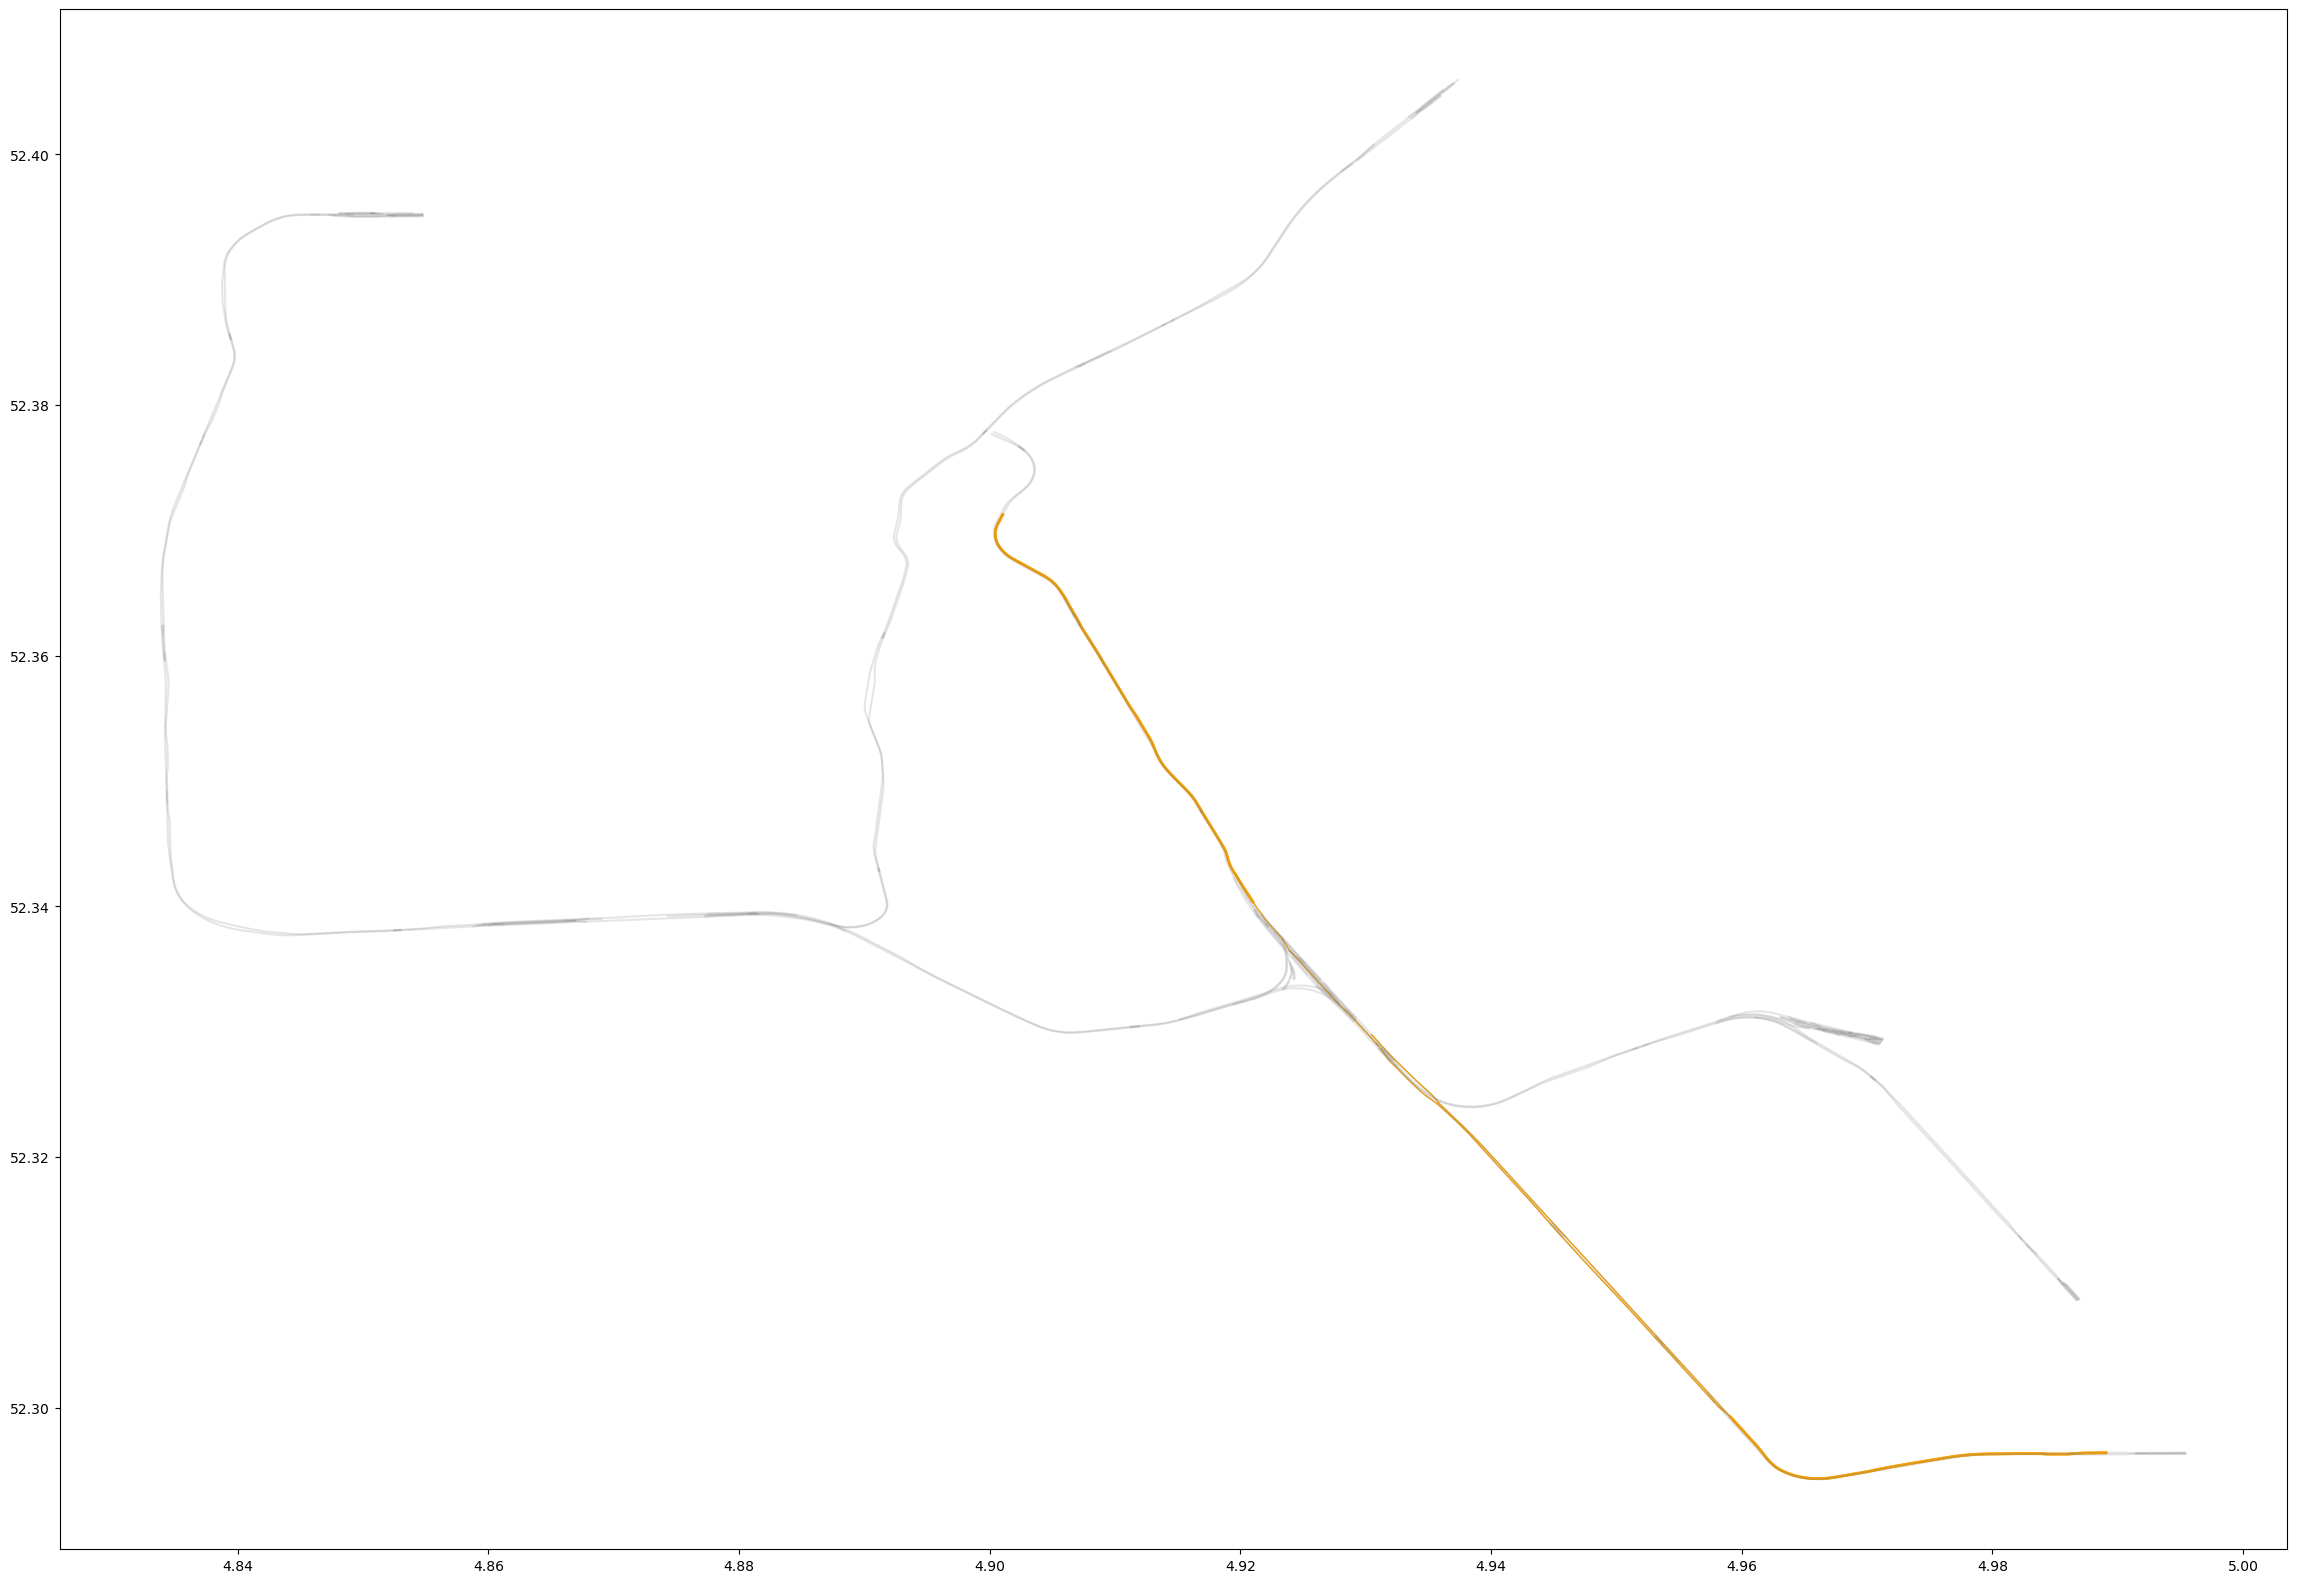

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(sub_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

## Test 5: Amsterdam 5 -- s-transfer, e-transfer, s_e has totally same route

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [23]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.900874272881293, 
    's_coordinates_y': 52.37660436631245, 
    'e_coordinates_x': 4.914198346635547, 
    'e_coordinates_y': 52.33842277940869
} 

In [24]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, sub_new_nodes)

In [25]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
44,POINT (4.90087 52.37735),2,731,Centraal Station,4.900869,52.377355,"(4.9008686, 52.3773546)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 52, 53, 54","51, 52, 53, 54"


In [27]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
77,POINT (4.92061 52.34019),2,830,Spaklerweg,4.920614,52.340191,"(4.9206141, 52.3401909)",Metro 53: Centraal Station => Gaasperplas,subway,"51, 53, 54","51, 53, 54"


In [28]:
sub_routes_gdf = gpd.GeoDataFrame(sub_routes.copy())
s_node_gdf = gpd.GeoDataFrame(start_node.copy())
e_node_gdf = gpd.GeoDataFrame(end_node.copy())

In [29]:
s_node_on_route_gdf = sub_routes_gdf[sub_routes_gdf.geometry.intersects(s_node_gdf.iloc[0].geometry)]
s_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
2,31249,subway,Isolatorweg,Metro 51: Centraal Station => Isolatorweg,51,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
6,18532,subway,Gaasperplas,Metro 53: Centraal Station => Gaasperplas,53,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
8,18423,subway,Gein,Metro 54: Centraal Station => Gein,54,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."


In [30]:
e_node_on_route_gdf = sub_routes_gdf[sub_routes_gdf.geometry.intersects(e_node_gdf.iloc[0].geometry)]
e_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
6,18532,subway,Gaasperplas,Metro 53: Centraal Station => Gaasperplas,53,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
8,18423,subway,Gein,Metro 54: Centraal Station => Gein,54,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [26]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [27]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

Some of e_on_route is the same as some of s_on_route 

The next step is to find the same routes----using function 's_e_same_routes'


In [28]:
s_on_route_ref

,ref
0,51
1,52
2,53
3,54


In [29]:
e_on_route_ref

,ref
0,51
1,53
2,54


### Find those same routes

In [30]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
0  51
2  53
3  54



,ref
0,51
2,53
3,54


### Get all stations between s_e nodes and transfer nodes

In [31]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,sub_routes,start_node,end_node,sub_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                 name                      geometry     geo_x  \
 0   17          Gaasperplas  POINT (4.9843391 52.3111615)  4.984339   
 1    3          Kraaiennest  POINT (4.9790073 52.3169789)  4.979007   
 2    2           Ganzenhoef  POINT (4.9728869 52.3236783)  4.972887   
 3    1    Verrijn Stuartweg  POINT (4.9672062 52.3282901)  4.967206   
 4    8  Station Diemen Zuid  POINT (4.9567748 52.3303113)  4.956775   
 5    0         Venserpolder  POINT (4.9464091 52.3267211)  4.946409   
 6    9      Van der Madeweg  POINT (4.9302391 52.3297174)  4.930239   
 7   10           Spaklerweg  POINT (4.9206141 52.3401909)  4.920614   
 8    7        Amstelstation  POINT (4.9174059 52.3466361)  4.917406   
 9    5         Wibautstraat  POINT (4.9118953 52.3545601)  4.911895   
 10  13         Weesperplein  POINT (4.9078472 52.3613094)  4.907847   
 11  11        Waterlooplein  POINT (4.9036061 52.3666363)  4.903606   
 12  12           Nieuwmarkt  POINT (4.9009379 52.3714238)  4.90

In [32]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id              name                      geometry     geo_x      geo_y  \
 13   6  Centraal Station  POINT (4.9008686 52.3773546)  4.900869  52.377355   
 12  12        Nieuwmarkt  POINT (4.9009379 52.3714238)  4.900938  52.371424   
 11  11     Waterlooplein  POINT (4.9036061 52.3666363)  4.903606  52.366636   
 10  13      Weesperplein  POINT (4.9078472 52.3613094)  4.907847  52.361309   
 9    5      Wibautstraat  POINT (4.9118953 52.3545601)  4.911895   52.35456   
 8    7     Amstelstation  POINT (4.9174059 52.3466361)  4.917406  52.346636   
 7   10        Spaklerweg  POINT (4.9206141 52.3401909)  4.920614  52.340191   
 
                               route_name_list ref   route  \
 13  Metro 53: Centraal Station => Gaasperplas  53  subway   
 12  Metro 53: Centraal Station => Gaasperplas  53  subway   
 11  Metro 53: Centraal Station => Gaasperplas  53  subway   
 10  Metro 53: Centraal Station => Gaasperplas  53  subway   
 9   Metro 53: Centraal Station => Gaasperplas  

### Get all nodes and id_pairs of nodes between s_e nodes

In [33]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,sub_new_nodes)
btw_all_id_pairs_list

[  s_id e_id
 0  260  460
 1  460  459
 2  459  867
 3  867  731
 4  731  819
 5  819  830,
   s_id e_id
 0  260  460
 1  460  459
 2  459  867
 3  867  731
 4  731  819
 5  819  830]

### Calculate shortest path and plot

In [34]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [35]:
btw_all_id_pairs_list_unique

[  s_id e_id
 0  260  460
 1  460  459
 2  459  867
 3  867  731
 4  731  819
 5  819  830]

In [36]:
G = create_ground_graph(edges, nodes)

In [37]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [38]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
549,324074918,"LINESTRING (4.9078472 52.3613094, 4.9078986 52...",subway,None,549,460,650,166.665234,0.006667,166,"(460, 650)","(650, 460)"
550,324074918,"LINESTRING (4.9087261 52.3599113, 4.9087418 52...",subway,None,550,650,657,82.987704,0.003320,82,"(650, 657)","(657, 650)"
551,324074918,"LINESTRING (4.9091571 52.3592136, 4.9092078 52...",subway,None,551,657,260,550.352011,0.022014,550,"(657, 260)","(260, 657)"
539,324074877,"LINESTRING (4.9036061 52.3666363, 4.9037158 52...",subway,None,539,459,653,427.723219,0.017109,427,"(459, 653)","(653, 459)"
541,324074877,"LINESTRING (4.9071618 52.362395, 4.9072096 52....",subway,None,541,647,460,129.484427,0.005179,129,"(647, 460)","(460, 647)"
701,397809154,"LINESTRING (4.9071618 52.362395, 4.9071476 52....",subway,yard,701,647,648,43.861656,0.001754,43,"(647, 648)","(648, 647)"
704,397809158,"LINESTRING (4.906818 52.3630635, 4.9067839 52....",subway,yard,704,652,653,35.310622,0.001412,35,"(652, 653)","(653, 652)"
724,397809187,"LINESTRING (4.906818 52.3630635, 4.9068543 52....",subway,yard,724,652,648,34.210329,0.001368,34,"(652, 648)","(648, 652)"
835,562757375,"LINESTRING (4.9009379 52.3714238, 4.9008918 52...",subway,None,835,867,459,619.925265,0.024797,619,"(867, 459)","(459, 867)"
834,562757375,"LINESTRING (4.9032137 52.3738502, 4.903211 52....",subway,None,834,733,867,313.766990,0.012551,313,"(733, 867)","(867, 733)"


In [39]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [40]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,324074918,"LINESTRING (4.9078472 52.3613094, 4.9078986 52...",subway,None,549,460,650,166.665234,0.006667,166,"(460, 650)","(650, 460)",1.0
1,324074918,"LINESTRING (4.9087261 52.3599113, 4.9087418 52...",subway,None,550,650,657,82.987704,0.003320,82,"(650, 657)","(657, 650)",1.0
2,324074918,"LINESTRING (4.9091571 52.3592136, 4.9092078 52...",subway,None,551,657,260,550.352011,0.022014,550,"(657, 260)","(260, 657)",2.0
3,324074877,"LINESTRING (4.9036061 52.3666363, 4.9037158 52...",subway,None,539,459,653,427.723219,0.017109,427,"(459, 653)","(653, 459)",1.0
4,324074877,"LINESTRING (4.9071618 52.362395, 4.9072096 52....",subway,None,541,647,460,129.484427,0.005179,129,"(647, 460)","(460, 647)",1.0
5,397809154,"LINESTRING (4.9071618 52.362395, 4.9071476 52....",subway,yard,701,647,648,43.861656,0.001754,43,"(647, 648)","(648, 647)",1.0
6,397809158,"LINESTRING (4.906818 52.3630635, 4.9067839 52....",subway,yard,704,652,653,35.310622,0.001412,35,"(652, 653)","(653, 652)",1.0
7,397809187,"LINESTRING (4.906818 52.3630635, 4.9068543 52....",subway,yard,724,652,648,34.210329,0.001368,34,"(652, 648)","(648, 652)",1.0
8,562757375,"LINESTRING (4.9009379 52.3714238, 4.9008918 52...",subway,None,835,867,459,619.925265,0.024797,619,"(867, 459)","(459, 867)",1.0
9,562757375,"LINESTRING (4.9032137 52.3738502, 4.903211 52....",subway,None,834,733,867,313.766990,0.012551,313,"(733, 867)","(867, 733)",1.0


In [41]:
shortest_path_edges_way.time.sum()

0.297779997534656

<Axes: >

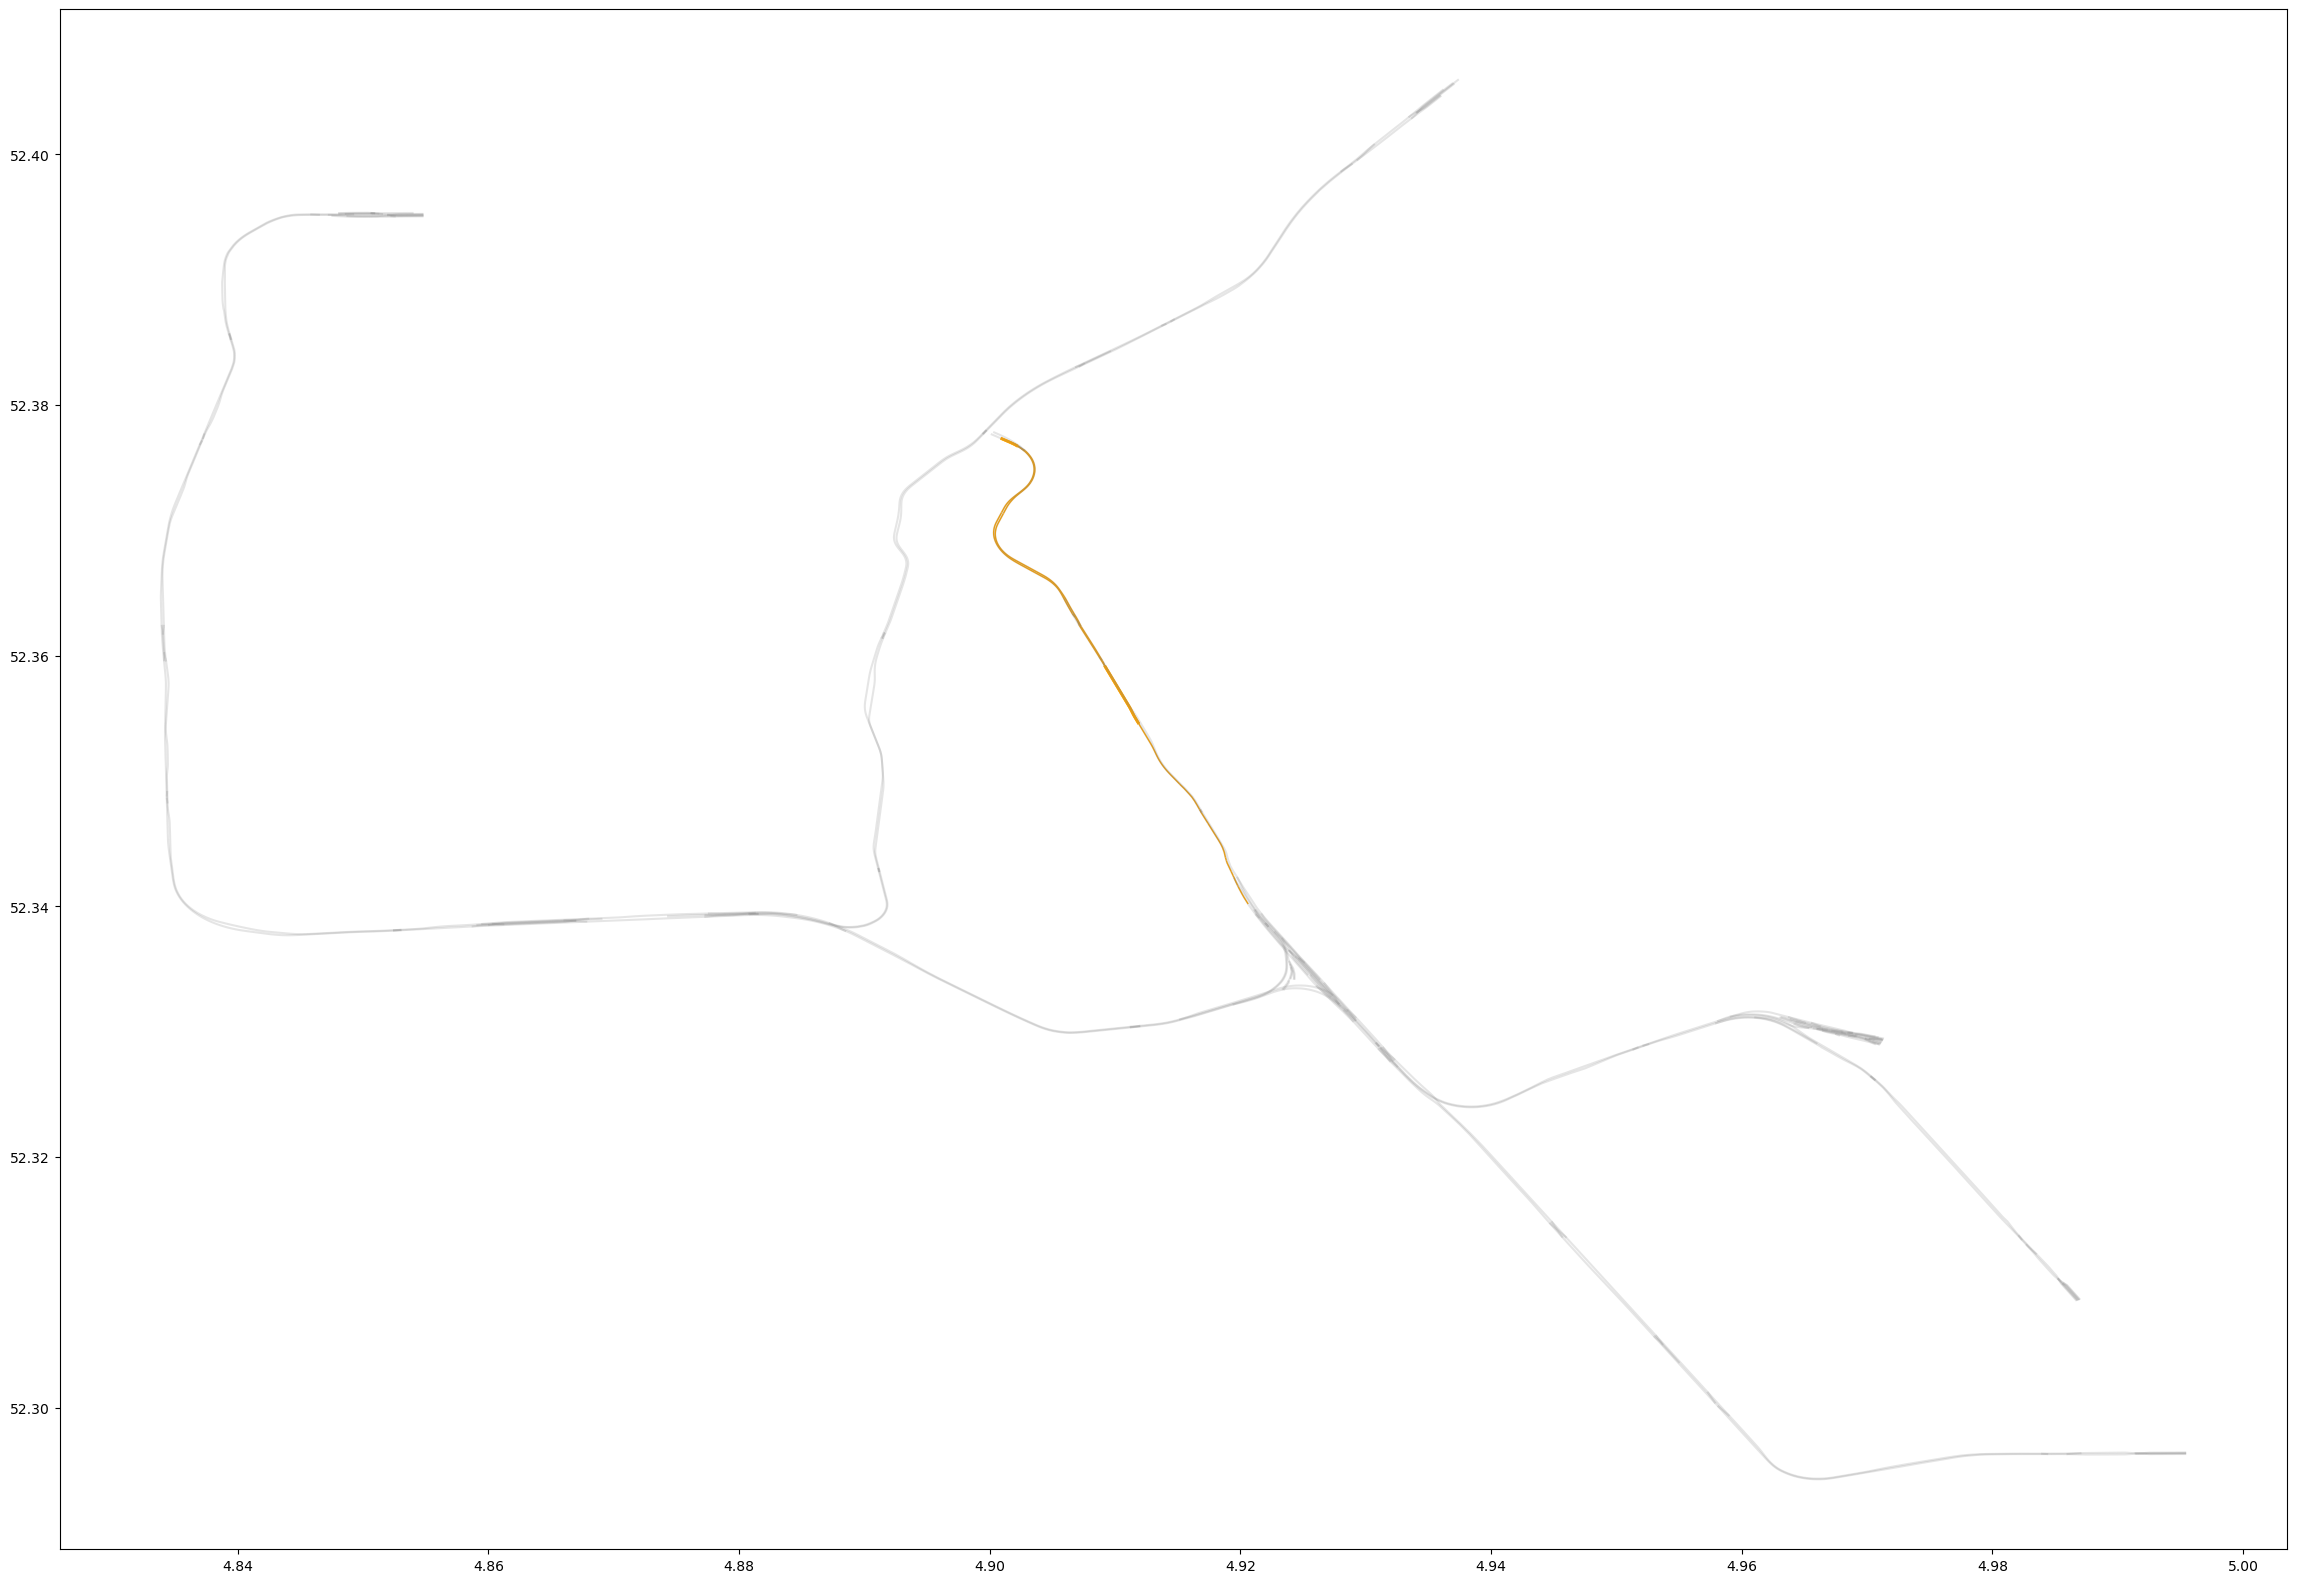

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(sub_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

<Axes: >

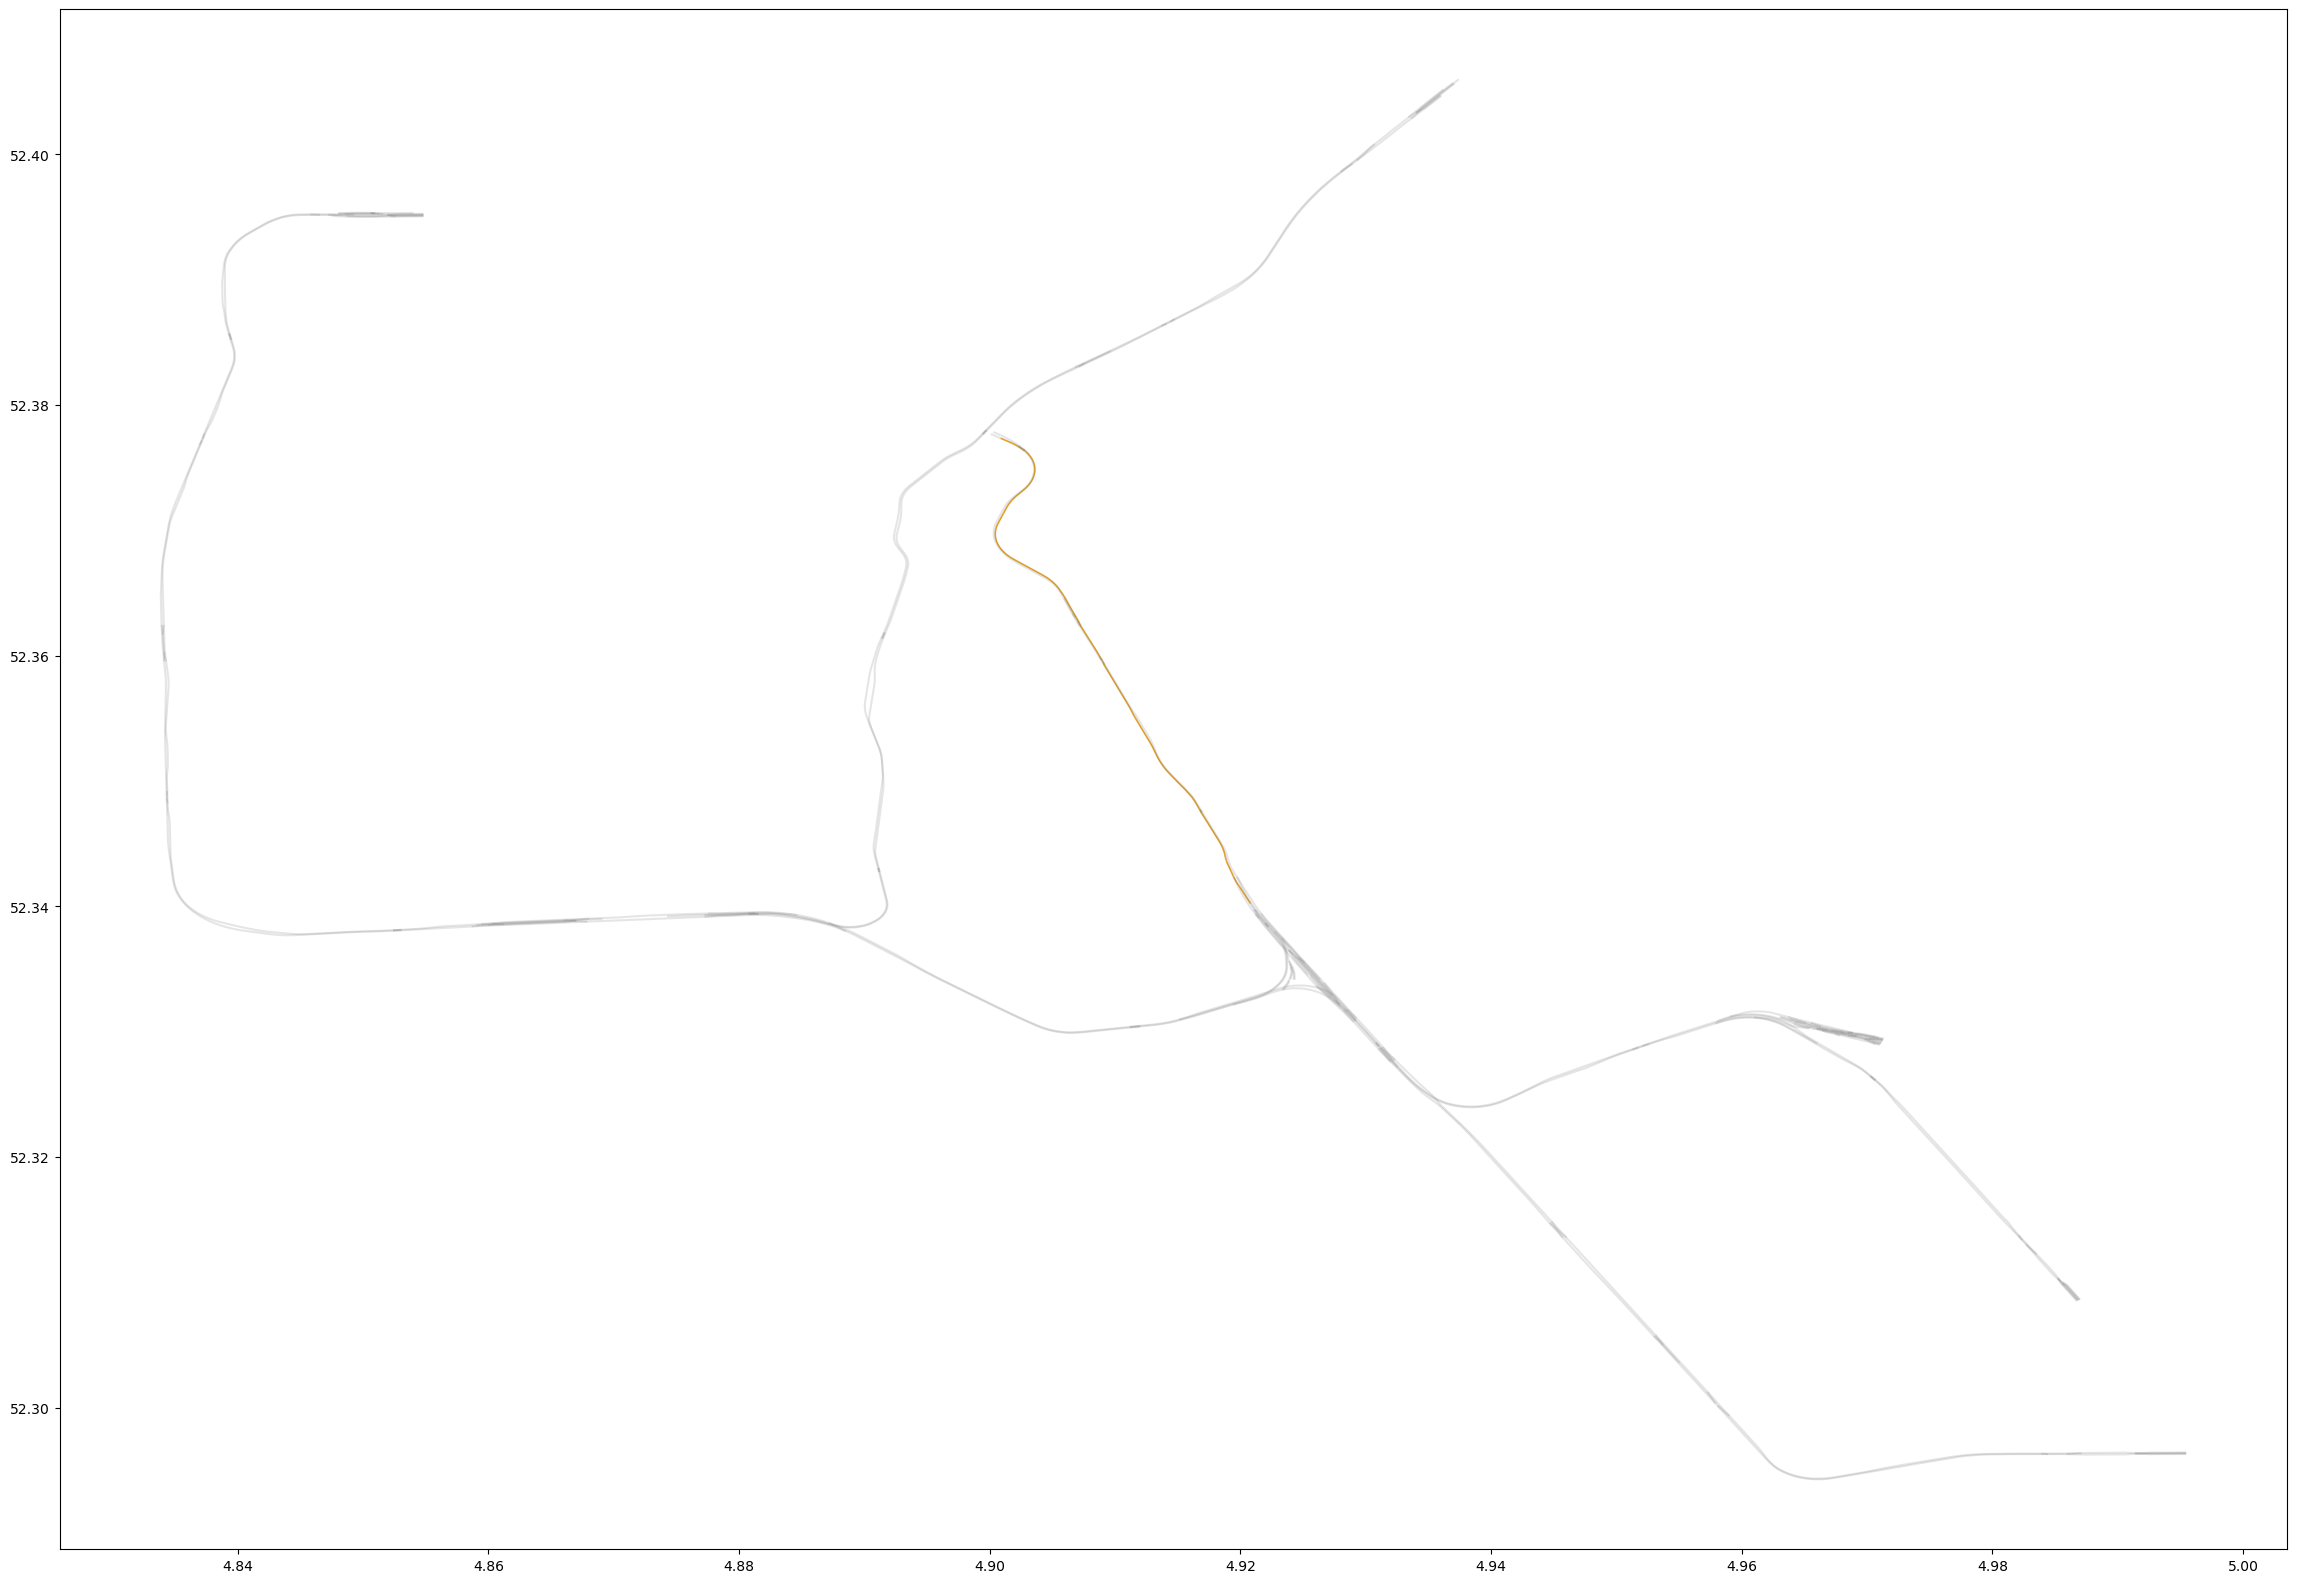

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(sub_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

## Test 1: Amsterdam 1 -- s-no transfer, e-transfer, s_e has one same route

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [24]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.9928801197905575, 
    's_coordinates_y': 52.3072242132468, 
    'e_coordinates_x': 4.905626404274936, 
    'e_coordinates_y': 52.37201190163594
} 

In [25]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, sub_new_nodes)

In [26]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
70,POINT (4.98434 52.31116),2,61,Gaasperplas,4.984339,52.311161,"(4.9843391, 52.3111615)",Metro 53: Centraal Station => Gaasperplas,subway,53,None


In [27]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
49,POINT (4.90108 52.37135),2,866,Nieuwmarkt,4.901085,52.371353,"(4.9010846, 52.371353)",Metro 51: Isolatorweg => Centraal Station,subway,"51, 53, 54","51, 53, 54"


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [28]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [29]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

One of e_on_route is the same as s_on_route 

The next step is to find the same route----using function 's_e_same_routes'


### Find those same routes

In [30]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
0  53



,ref
0,53


### Get all stations between s_e nodes and transfer nodes

In [31]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,sub_routes,start_node,end_node,sub_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                 name                      geometry     geo_x  \
 0   15     Centraal Station  POINT (4.9010471 52.3775081)  4.901047   
 1   11           Nieuwmarkt   POINT (4.9010846 52.371353)  4.901085   
 2   12        Waterlooplein  POINT (4.9037527 52.3666905)  4.903753   
 3   13         Weesperplein  POINT (4.9079182 52.3613263)  4.907918   
 4    0         Wibautstraat  POINT (4.9120486 52.3545947)  4.912049   
 5    4        Amstelstation  POINT (4.9174767 52.3466483)  4.917477   
 6   10           Spaklerweg  POINT (4.9210454 52.3402871)  4.921045   
 7    8      Van der Madeweg  POINT (4.9302846 52.3297352)  4.930285   
 8    9         Venserpolder  POINT (4.9462773 52.3268326)  4.946277   
 9    6  Station Diemen Zuid  POINT (4.9566878 52.3304057)  4.956688   
 10   7    Verrijn Stuartweg  POINT (4.9673352 52.3283668)  4.967335   
 11   2           Ganzenhoef  POINT (4.9730859 52.3237237)  4.973086   
 12   5          Kraaiennest  POINT (4.9791866 52.3170385)  4.97

In [32]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id                 name                      geometry     geo_x  \
 13   3          Gaasperplas  POINT (4.9842364 52.3115025)  4.984236   
 12   5          Kraaiennest  POINT (4.9791866 52.3170385)  4.979187   
 11   2           Ganzenhoef  POINT (4.9730859 52.3237237)  4.973086   
 10   7    Verrijn Stuartweg  POINT (4.9673352 52.3283668)  4.967335   
 9    6  Station Diemen Zuid  POINT (4.9566878 52.3304057)  4.956688   
 8    9         Venserpolder  POINT (4.9462773 52.3268326)  4.946277   
 7    8      Van der Madeweg  POINT (4.9302846 52.3297352)  4.930285   
 6   10           Spaklerweg  POINT (4.9210454 52.3402871)  4.921045   
 5    4        Amstelstation  POINT (4.9174767 52.3466483)  4.917477   
 4    0         Wibautstraat  POINT (4.9120486 52.3545947)  4.912049   
 3   13         Weesperplein  POINT (4.9079182 52.3613263)  4.907918   
 2   12        Waterlooplein  POINT (4.9037527 52.3666905)  4.903753   
 1   11           Nieuwmarkt   POINT (4.9010846 52.371353)  4.90

### Get all nodes and id_pairs of nodes between s_e nodes

In [33]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,sub_new_nodes)
btw_all_id_pairs_list

[   s_id e_id
 0   866  137
 1   137  138
 2   138  139
 3   139  820
 4   820  833
 5   833  827
 6   827  829
 7   829  823
 8   823  824
 9   824  301
 10  301  821
 11  821  331]

### Calculate shortest path and plot

In [34]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [35]:
btw_all_id_pairs_list_unique

[   s_id e_id
 0   866  137
 1   137  138
 2   138  139
 3   139  820
 4   820  833
 5   833  827
 6   827  829
 7   829  823
 8   823  824
 9   824  301
 10  301  821
 11  821  331]

In [36]:
G = create_ground_graph(edges, nodes)

In [37]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [38]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
833,562757374,"LINESTRING (4.9010846 52.371353, 4.9010385 52....",subway,None,833,866,137,609.918310,0.024397,609,"(866, 137)","(137, 866)"
148,39271189,"LINESTRING (4.9037527 52.3666905, 4.9038624 52...",subway,None,148,137,678,551.595065,0.022064,551,"(137, 678)","(678, 137)"
149,39271189,"LINESTRING (4.907289 52.3623187, 4.9073266 52....",subway,None,149,678,138,118.432627,0.004737,118,"(678, 138)","(138, 678)"
150,39271191,"LINESTRING (4.9079182 52.3613263, 4.9079709 52...",subway,None,150,138,651,204.059056,0.008162,204,"(138, 651)","(651, 138)"
151,39271191,"LINESTRING (4.9089751 52.3596101, 4.9090047 52...",subway,None,151,651,656,13.408083,0.000536,13,"(651, 656)","(656, 651)"
...,...,...,...,...,...,...,...,...,...,...,...,...
350,166161658,"LINESTRING (4.9820664 52.3137766, 4.9818561 52...",subway,None,350,306,300,180.459168,0.007218,180,"(306, 300)","(300, 306)"
369,166187919,"LINESTRING (4.9842364 52.3115025, 4.9837468 52...",subway,None,369,331,332,66.129893,0.002645,66,"(331, 332)","(332, 331)"
570,377776718,"LINESTRING (4.9837468 52.3120156, 4.9836026 52...",subway,None,570,332,476,28.693135,0.001148,28,"(332, 476)","(476, 332)"
571,377776718,"LINESTRING (4.9835318 52.3122373, 4.9830818 52...",subway,None,571,476,482,59.546511,0.002382,59,"(476, 482)","(482, 476)"


In [39]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [40]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,562757374,"LINESTRING (4.9010846 52.371353, 4.9010385 52....",subway,None,833,866,137,609.918310,0.024397,609,"(866, 137)","(137, 866)",1.0
1,39271189,"LINESTRING (4.9037527 52.3666905, 4.9038624 52...",subway,None,148,137,678,551.595065,0.022064,551,"(137, 678)","(678, 137)",1.0
2,39271189,"LINESTRING (4.907289 52.3623187, 4.9073266 52....",subway,None,149,678,138,118.432627,0.004737,118,"(678, 138)","(138, 678)",1.0
3,39271191,"LINESTRING (4.9079182 52.3613263, 4.9079709 52...",subway,None,150,138,651,204.059056,0.008162,204,"(138, 651)","(651, 138)",1.0
4,39271191,"LINESTRING (4.9089751 52.3596101, 4.9090047 52...",subway,None,151,651,656,13.408083,0.000536,13,"(651, 656)","(656, 651)",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,166161658,"LINESTRING (4.9820664 52.3137766, 4.9818561 52...",subway,None,350,306,300,180.459168,0.007218,180,"(306, 300)","(300, 306)",1.0
79,166187919,"LINESTRING (4.9842364 52.3115025, 4.9837468 52...",subway,None,369,331,332,66.129893,0.002645,66,"(331, 332)","(332, 331)",1.0
80,377776718,"LINESTRING (4.9837468 52.3120156, 4.9836026 52...",subway,None,570,332,476,28.693135,0.001148,28,"(332, 476)","(476, 332)",1.0
81,377776718,"LINESTRING (4.9835318 52.3122373, 4.9830818 52...",subway,None,571,476,482,59.546511,0.002382,59,"(476, 482)","(482, 476)",1.0


In [41]:
shortest_path_edges_way.time.sum()

0.4214642141330729

<Axes: >

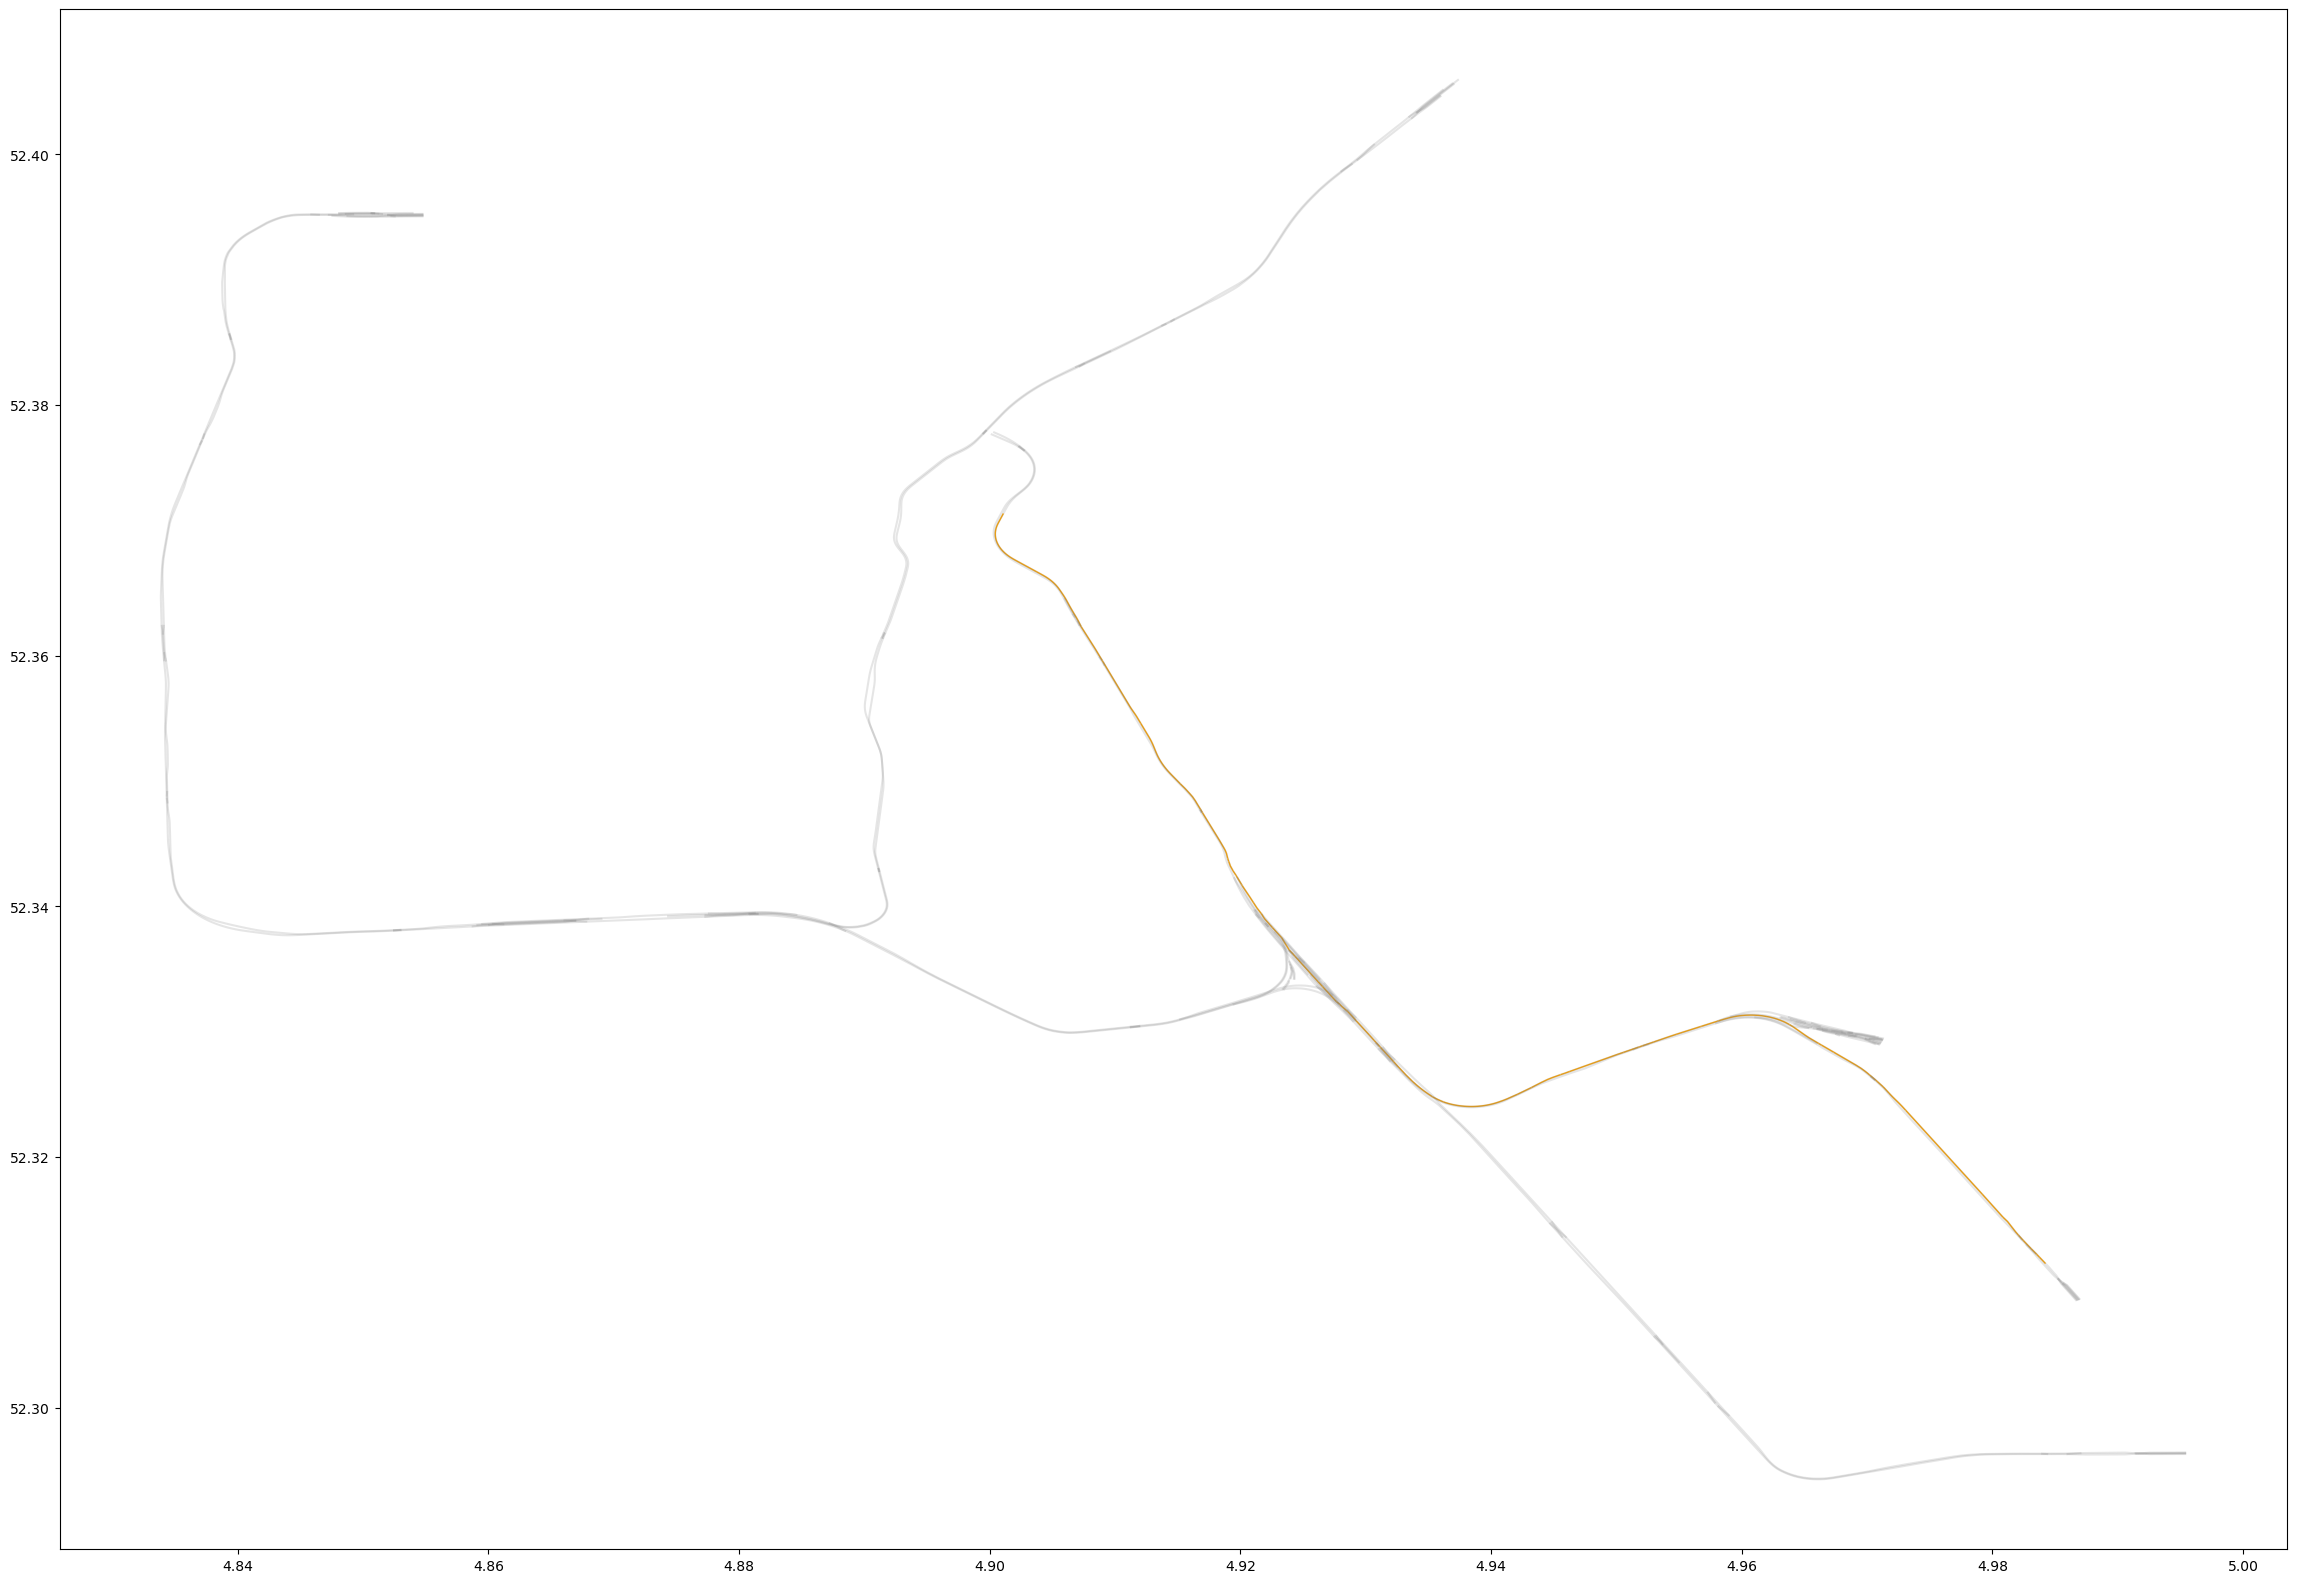

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(sub_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')